# Proyecto integrador

### Carga de librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#Define la paleta de colores a utilizarse en los gráficos.
mi_paleta = ["#5AD3D5", "#F3CA55", "#5AABE6", "#E69B67", "#698091", "#EFF219"]  

## Avance 1

In [3]:
#Leer el archivo .CSV, y parsear la columna de fecha "date".
data = pd.read_csv('data_latinoamerica.csv', parse_dates=['date'])

#Ver las primeras filas
data.head()

location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
# Controlar que la tabla tenga la cantidad de filas y columnas que necesitamos.
filas, columnas = data.shape 
print(f"El archivo CSV tiene {filas} filas y {columnas} columnas.")

El archivo CSV tiene 12216057 filas y 50 columnas.


In [5]:
# Filtrar por los paises sobre los cuales vamos a realizar el análisis.
paises_seleccionados=["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]
data_latinoamerica = data[data["country_name"].isin(paises_seleccionados)]

In [6]:
#Volver a controlar la cantidad de filas y columnas.
np.shape(data_latinoamerica)

(11970289, 50)

In [7]:
#De esta forma filtramos por los paises indicados en la consigna, pero basado en lo que vimos en clase,
#lo que realmente necesitamos es filtrar por location_key y no por country_name, para evitar tantos nulos.
data_paises = data_latinoamerica[data_latinoamerica["location_key"].isin(["AR", "CL", "CO", "MX", "PE", "BR"])]
np.shape(data_paises) #Nuevamente controlar el tamaño.

(5946, 50)

In [8]:
# Filtrar por aquellos datos con fecha superior a 2021-01-01.
data_paises_fecha = data_paises[data_paises["date"]>"2021-01-01"]
np.shape(data_paises_fecha)

(3744, 50)

In [9]:
#Controlar la cantidad de valores nulos que hay por columna para poder limpiar los datos.
valores_nulos = data_paises_fecha.isnull().sum()[data_paises_fecha.isnull().sum()>0] 
print(valores_nulos)
print(np.shape(data_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [10]:
#Considero que hay que rellenar con 0 los nulos de las columnas "cumulative_vaccine_doses_administered", "new_recovered" y "cumulative_recovered", porque completar con la media distorcionaria los resultados ya que hay demasiados nulos.
data_paises_fecha.loc[:, ["cumulative_vaccine_doses_administered","new_recovered", "cumulative_recovered"]] = data_paises_fecha[["cumulative_vaccine_doses_administered","new_recovered", "cumulative_recovered"]].fillna(0)

In [11]:
#Para las demas columnas con datos nulos, crear un ciclo for para llenar con la media de cada pais.
for pais in data_paises_fecha["location_key"].unique():  
    for columna in valores_nulos.index:
        media_pais = round(data_paises_fecha[data_paises_fecha["location_key"] == pais][columna].mean(),2)
        data_paises_fecha.loc[data_paises_fecha["location_key"] == pais, columna] = data_paises_fecha.loc[data_paises_fecha["location_key"] == pais, columna].fillna(media_pais)

In [12]:
#Controlar si finalmente no quedaron nulos en la tabla.
valores_nulos = data_paises_fecha.isnull().sum()[data_paises_fecha.isnull().sum()>0] 
print(valores_nulos)
print(np.shape(data_paises_fecha))

Series([], dtype: int64)
(3744, 50)


In [13]:
#Guardar en otro archivo .csv la tabla limpia. 
data_paises_fecha.to_csv("datos_finales_filtrado.csv", index=False)

In [14]:
#Controlar que el archivo se haya guardado bien y que se pueda leer sin problemas.
data_limpia = pd.read_csv("datos_finales_filtrado.csv")

In [15]:
data_limpia

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina        7767.00   
1              AR  2021-01-03           AR    Argentina        4934.00   
2              AR  2021-01-04           AR    Argentina       13953.00   
3              AR  2021-01-05           AR    Argentina       14085.00   
4              AR  2021-01-06           AR    Argentina       14496.00   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru        1150.00   
3740           PE  2022-09-14           PE         Peru        5032.18   
3741           PE  2022-09-15           PE         Peru        5032.18   
3742           PE  2022-09-16           PE         Peru        5032.18   
3743           PE  2022-09-17           PE         Peru        5032.18   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166.00            1670634.00             46688.00   
1           157.00            1675568.00             46845.00   
2           157.00            1689521.00             47002.00   
3           160.00            1703606.00             47162.00   
4           131.00            1718102.00             47293.00   
...            ...                   ...                  ...   
3739         22.00            4127612.00            216173.00   
3740        197.23            2576905.63            188954.37   
3741        197.23            2576905.63            188954.37   
3742        197.23            2576905.63            188954.37   
3743        197.23            2576905.63            188954.37   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [16]:
#Crear un bucle for para el cálculo de estadísticas descriptivas.
for i in data_limpia.columns :
    print(i)
    print(data_limpia[i].describe())
    print("-----------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------
new_confirmed
count      3744.000000
mean      13921.908929
std       24219.361379
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------
new_deceased
count     3744.000000
mean       276.887415
std        507.240029
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
N

In [17]:
#Crear un bucle while para el cálculo de estadísticas descriptivas.
i=0
while i<len(data_limpia.columns):
    print(data_limpia.columns[i])
    print(data_limpia[data_limpia.columns[i]].describe())
    print("-----------------------------------")
    i+=1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908929
std       24219.361379
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
count     3744.000000
mean       276.887415
std        507.240029
min          0.000000
25%         26.000000
50%    

##### *¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?*
Las estadísticas descriptivas proporcionan un resumen rápido de las características principales de un conjunto de datos:

Count: Número de observaciones no nulas. Ayuda a entender la cantidad de datos disponibles para el análisis.
Mean: Promedio de los valores. Proporciona una idea del valor central de los datos.
Median: Valor central que divide los datos en dos partes iguales. Es útil para entender la distribución central sin ser afectado por valores atípicos.
Min y Max: Valores mínimo y máximo. Proporcionan el rango de los datos y ayudan a identificar posibles valores atípicos.
Estas métricas son fundamentales para comprender la distribución, tendencia central y variabilidad de los datos, lo cual es esencial para cualquier análisis más profundo.

##### *¿Se muestran todas las estadísticas en todas las columnas durante el análisis?*
No, no todas las estadísticas se muestran en todas las columnas durante el análisis.

##### *¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?*
La razón es que algunas estadísticas no son aplicables o no tienen sentido para ciertos tipos de datos. Por ejemplo:

Las columnas categóricas no tienen sentido para el cálculo de la media, desviación estándar, etc.
Algunas columnas pueden tener una gran cantidad de valores nulos que pueden distorsionar las estadísticas calculadas si no se tratan adecuadamente.

In [18]:
# Crear una función que permita obtener la mediana, varianza y el rango.
def describir_datos(data):
    for i in data.columns:
        if data [i].dtype=="float64" or data [i].dtype=="int64":
            print(i)
            print("Mediana: ", data[i].median())
            print("Varianza: ", data[i].var())
            print("Rango: ", data[i].max()-data[i].min())
            print("Moda: ", data[i].mode())
            print("--------------------------")
describir_datos(data_limpia)            


new_confirmed
Mediana:  5214.0
Varianza:  586577465.6078758
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
--------------------------
new_deceased
Mediana:  100.5
Varianza:  257292.44728815724
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
--------------------------
cumulative_confirmed
Mediana:  3632143.5
Varianza:  63828420109852.83
Rango:  34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
--------------------------
cumulative_deceased
Mediana: 

#####  *¿Qué representa la mediana?*
La mediana es una medida de tendencia central que divide un conjunto de datos ordenados en dos partes iguales. Es el valor que ocupa la posición central cuando los datos están ordenados de menor a mayor (o viceversa).

##### *¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?*
##### *¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?*
Consistencia: Cuando la varianza es baja y el rango es estrecho, los datos tienden a estar concentrados alrededor de la media y la mediana. Esto sugiere una consistencia en los datos, ya que no hay una gran variabilidad entre las observaciones.

Variabilidad: Una varianza alta y un rango amplio indican una mayor variabilidad entre los datos. Esto significa que las observaciones pueden estar más dispersas alrededor de la media y la mediana, lo que refleja una mayor variabilidad en el conjunto de datos.

## Avance 2

In [19]:
data_limpia = pd.read_csv("datos_finales_filtrado.csv")

In [20]:
#Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset.

for i in data_limpia.columns :
    print(i)
    print(data_limpia[i].describe())
    print("-----------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------
new_confirmed
count      3744.000000
mean      13921.908929
std       24219.361379
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------
new_deceased
count     3744.000000
mean       276.887415
std        507.240029
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
N

In [21]:
def describir_datos(data):
    for i in data.columns:
        if data [i].dtype=="float64" or data [i].dtype=="int64":
            print(i)
            print("Mediana: ", data[i].median())
            print("Varianza: ", data[i].var())
            print("Rango: ", data[i].max()-data[i].min())
            print("Moda: ", data[i].mode())
            print("--------------------------")
describir_datos(data_limpia)            


new_confirmed
Mediana:  5214.0
Varianza:  586577465.6078758
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
--------------------------
new_deceased
Mediana:  100.5
Varianza:  257292.44728815724
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
--------------------------
cumulative_confirmed
Mediana:  3632143.5
Varianza:  63828420109852.83
Rango:  34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
--------------------------
cumulative_deceased
Mediana: 

In [22]:
#Volver a llamar a los paises filtrados, para poder realizar análisis sobre esta variable.
paises_seleccionados=["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

In [23]:
#Poner como indice la columna "date" para poder realizar análisis de los datos a lo largo del tiempo.
data_limpia["date"]= pd.to_datetime(data_limpia["date"])
data_limpia.set_index("date", inplace=True)

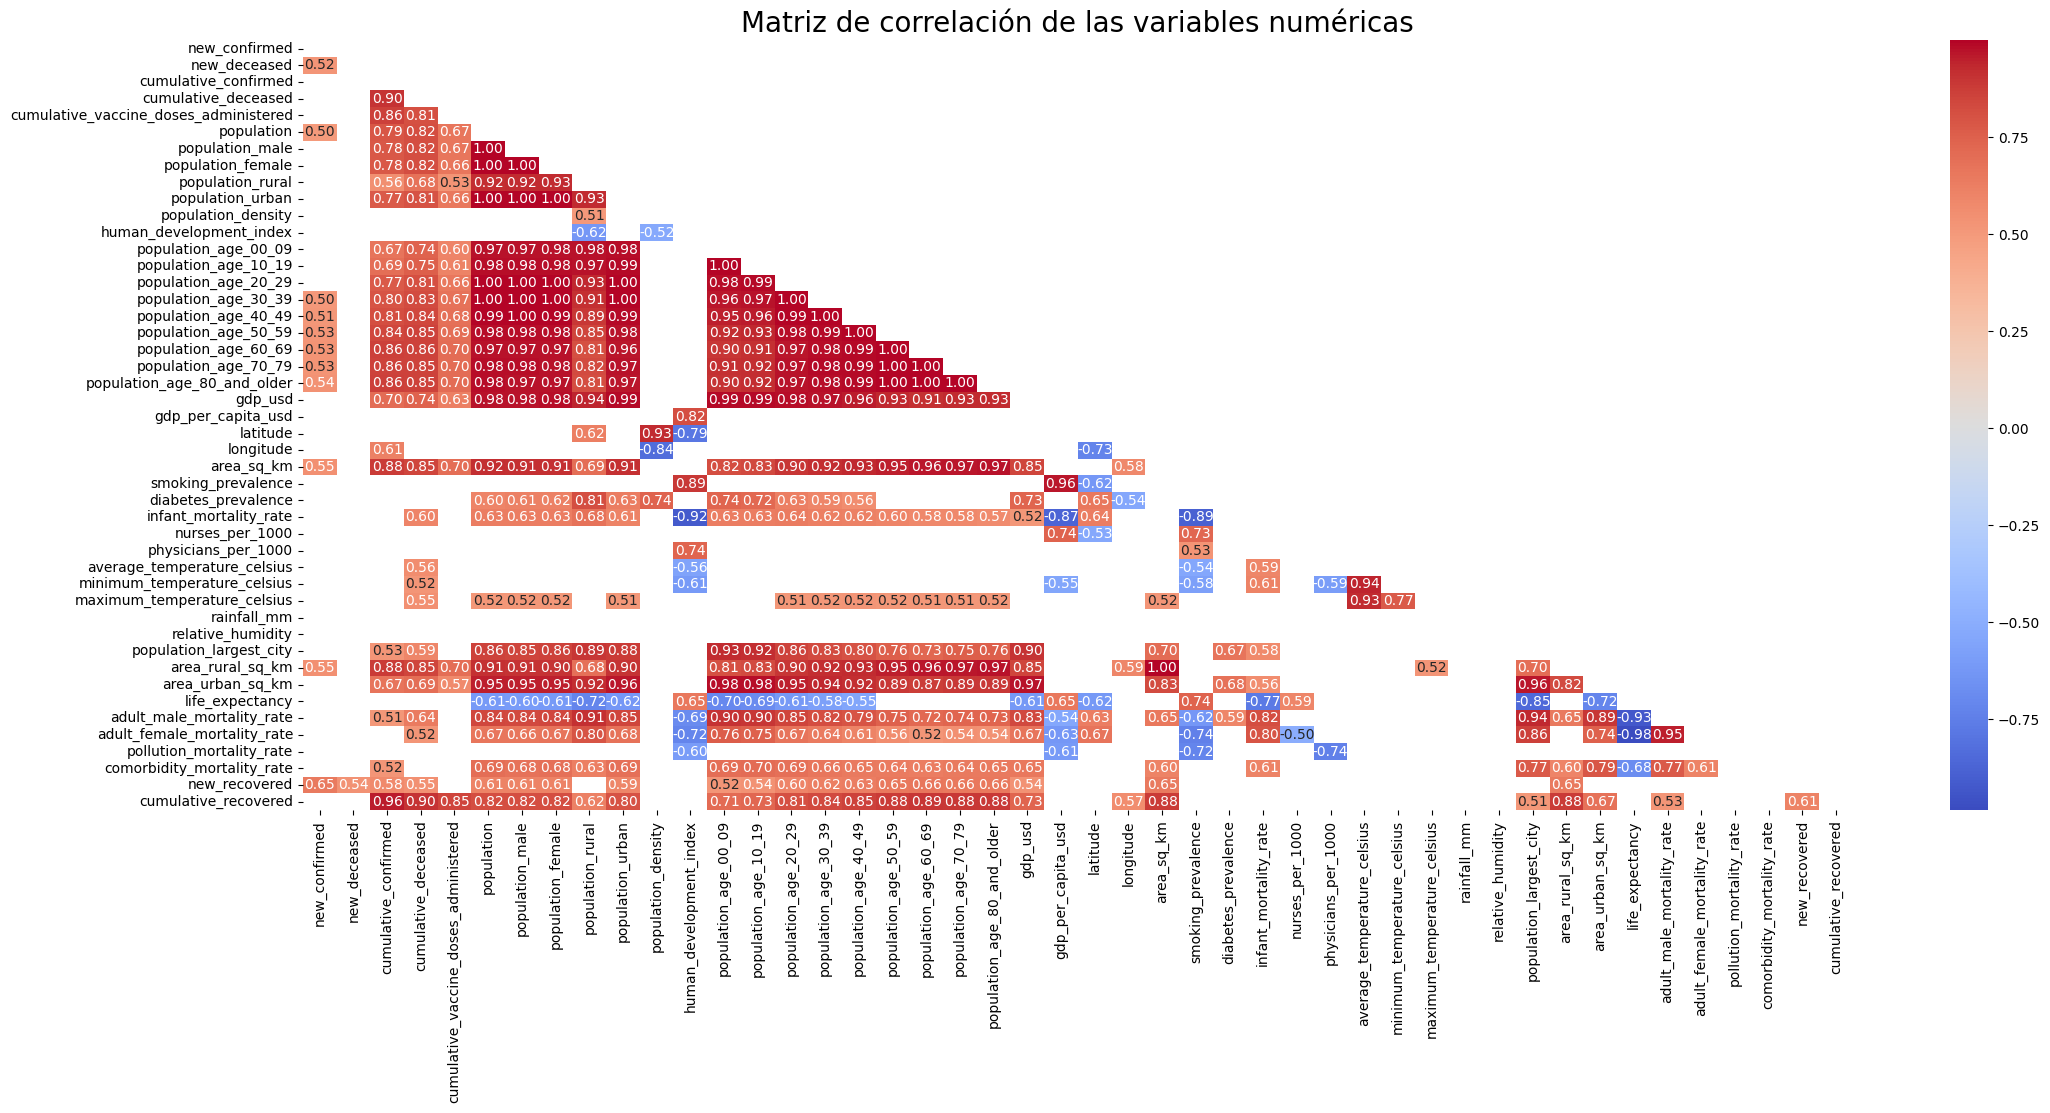

In [24]:
#Crear una matriz de correlación de las variables numéricas.
columnas_numericas = data_limpia.select_dtypes(include=["float64", "int64"]).columns
matriz_correlacion = data_limpia[columnas_numericas].corr()

#Crear una submáscara para solo tomar una parte del gráfico, el triangulo de abajo.
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

#Para filtrar por valores mayores a 0.5, es decir donde hay una correlación fuerte, y tambien valores negativos:
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion)>abs(0.5)]

#Crear la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(matriz_correlacion, mask = mascara, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación de las variables numéricas", fontsize = 20)

plt.show()

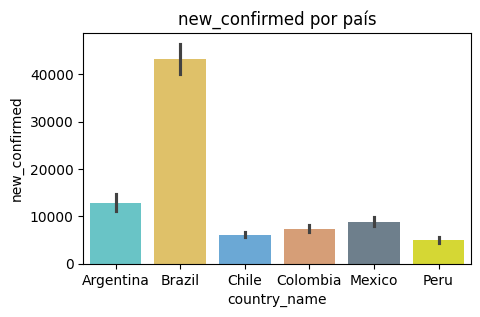

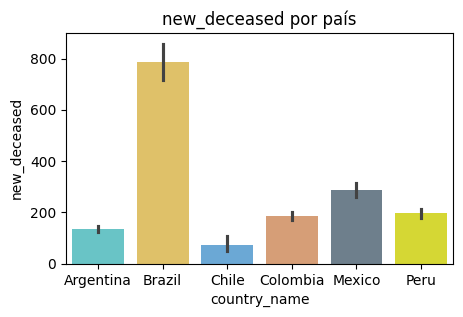

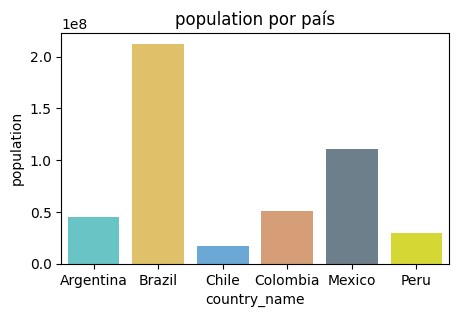

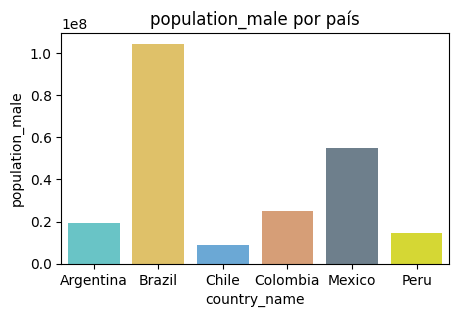

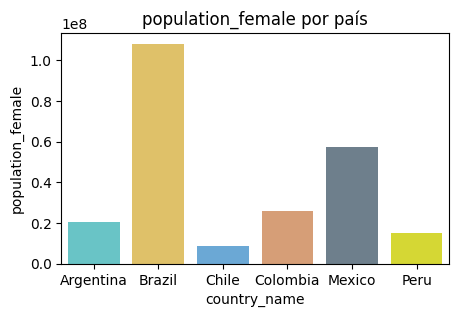

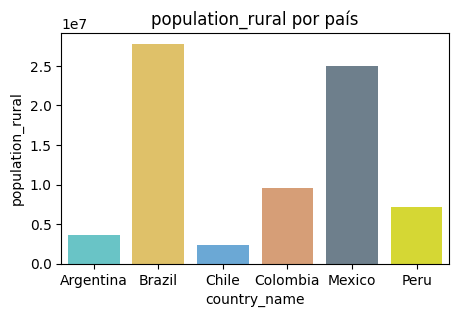

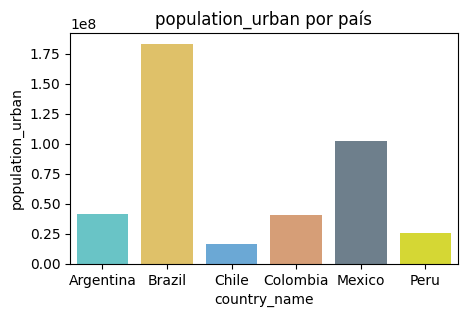

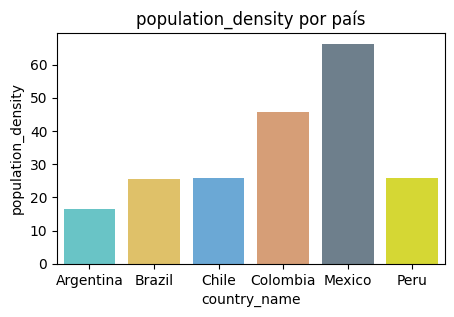

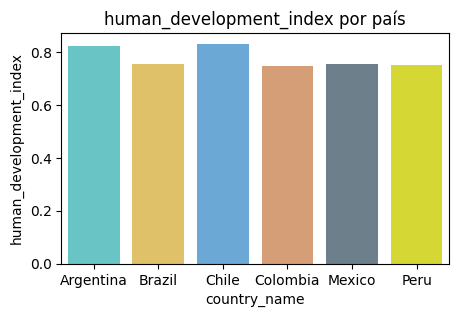

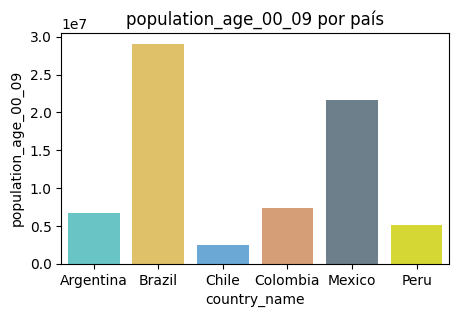

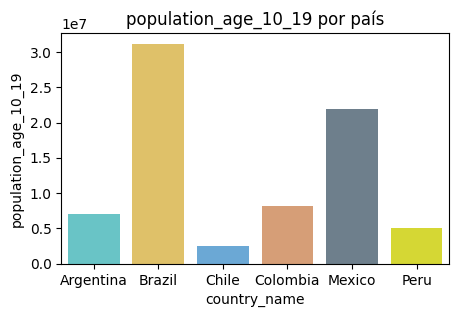

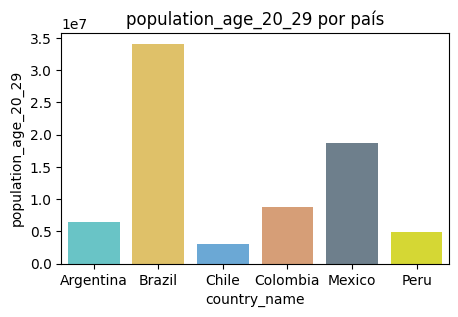

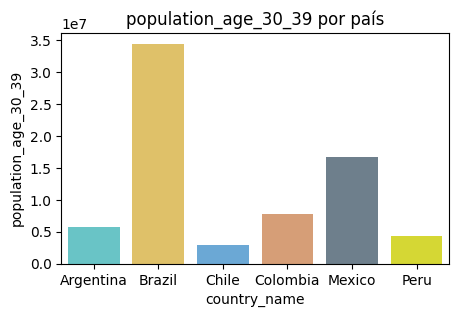

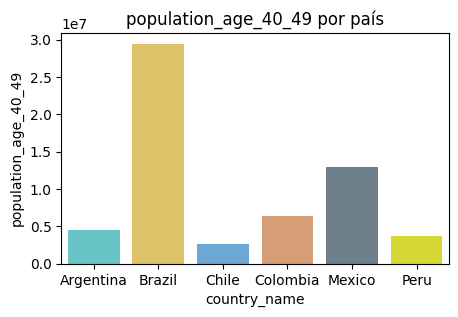

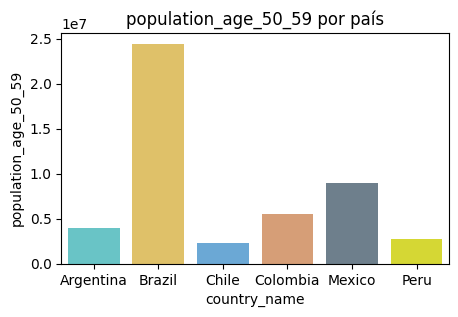

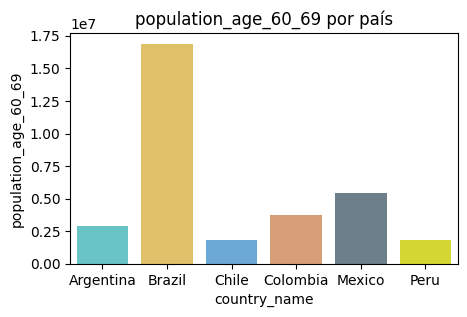

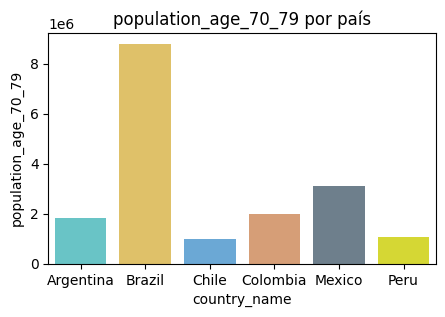

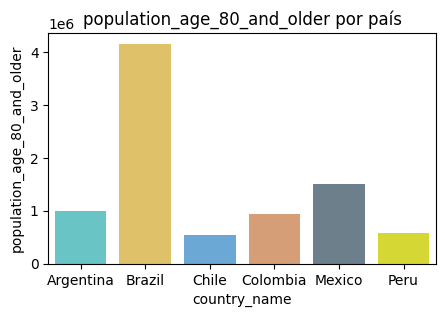

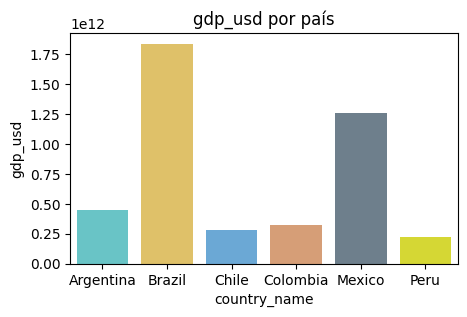

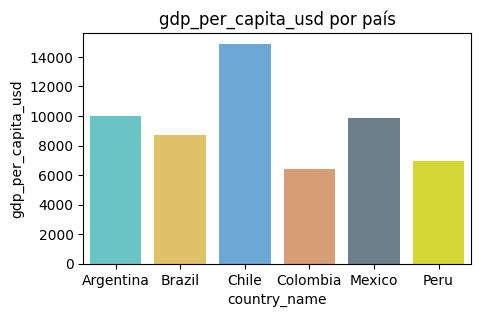

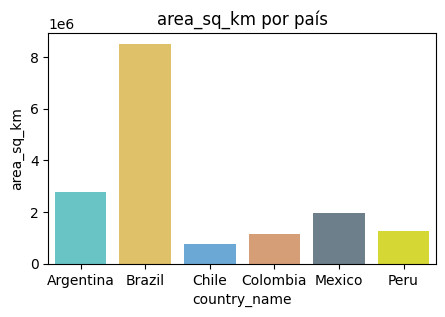

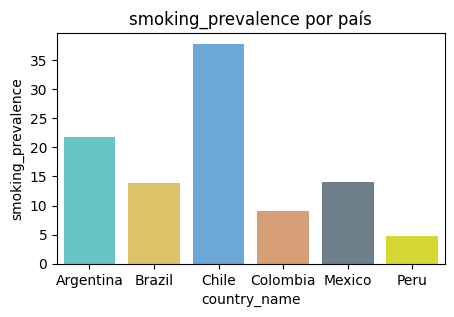

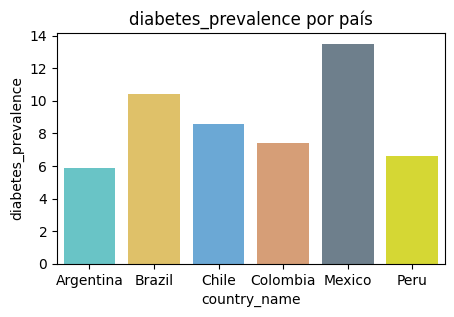

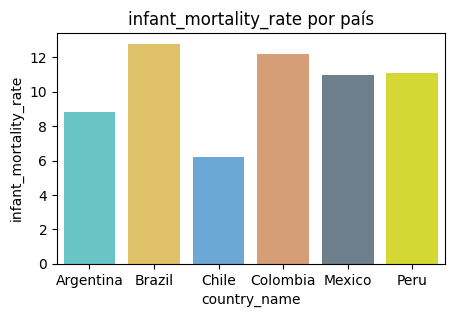

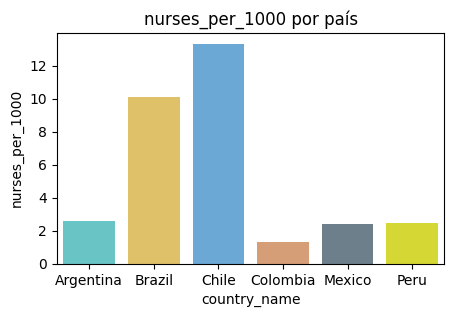

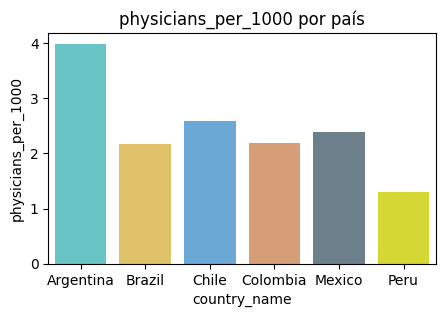

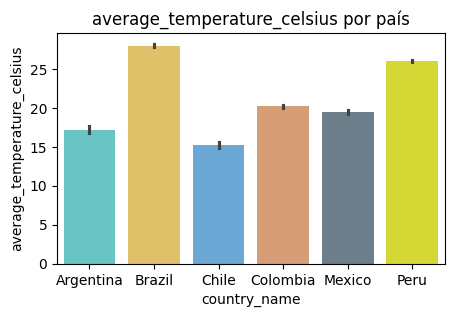

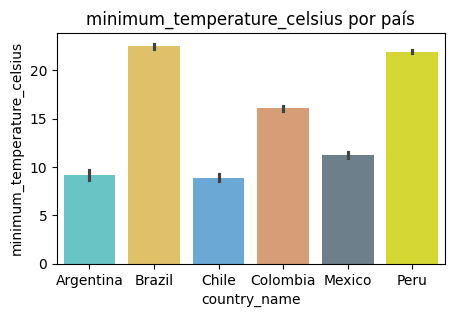

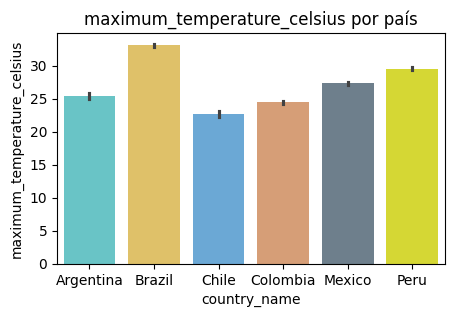

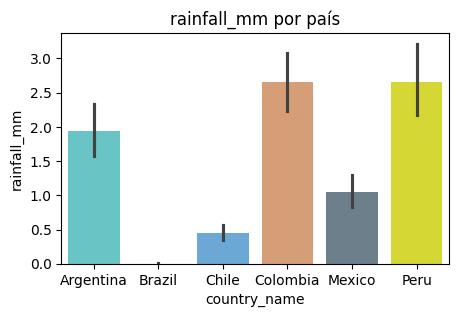

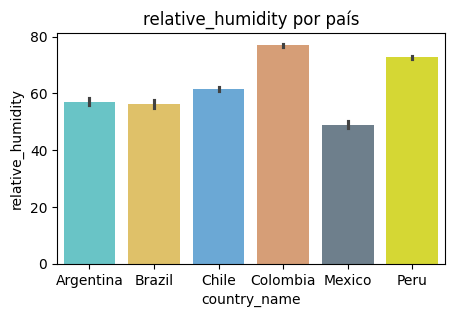

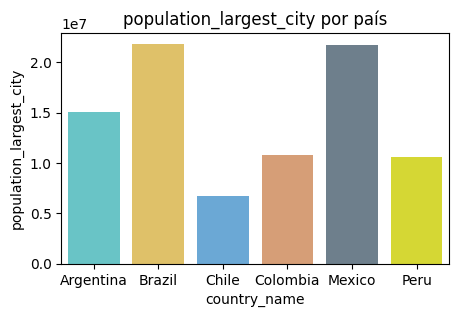

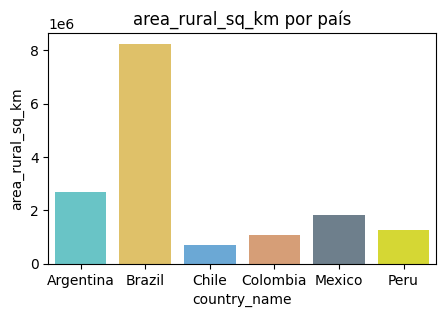

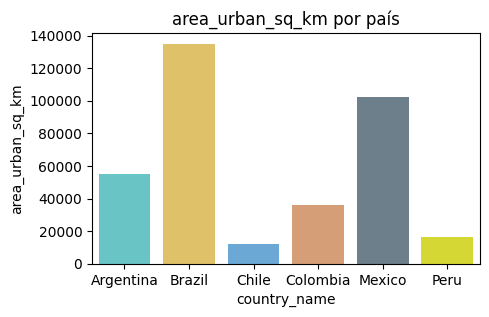

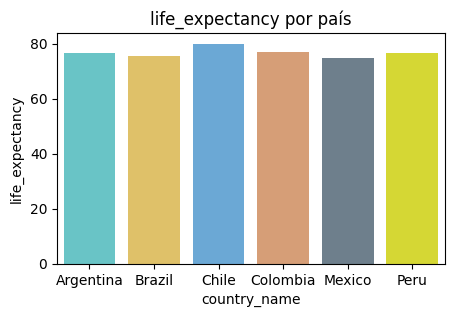

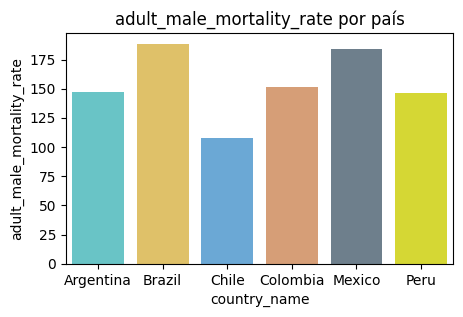

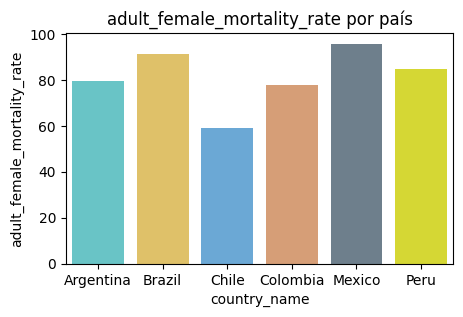

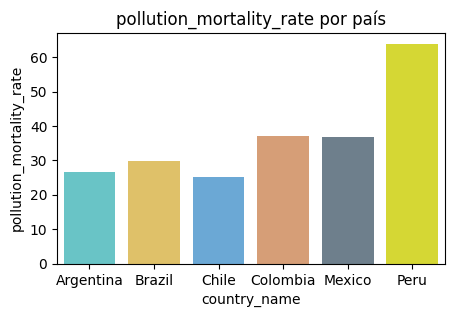

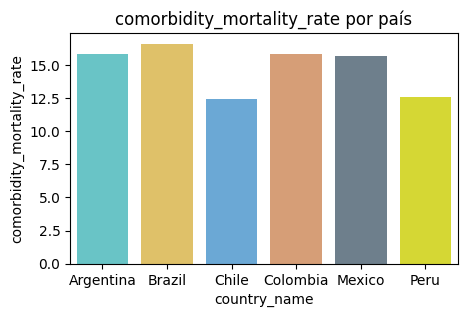

In [25]:
#Gráficos de barras de países contra el resto de variables. 
# Crear un ciclo for, para pasar por todas las variables excepto aquellas que no revelarían información significativa en sus gráficas.
for i in data_limpia.columns:
    if i not in ["location_key", "date", "country_code", "country_name", "latitude", "longitude", "cumulative_confirmed", "cumulative_deceased", "cumulative_recovered", "cumulative_vaccine_doses_administered", "new_recovered"]:
        fig, ax = plt.subplots(figsize=(5,3))  #Definir el gráfico.
        sns.barplot(x="country_name", y=i, data=data_limpia, ax=ax, hue="country_name", palette=mi_paleta) #Definir ejes, datos, tamaño.
        plt.title(f"{i} por país")
        plt.show()

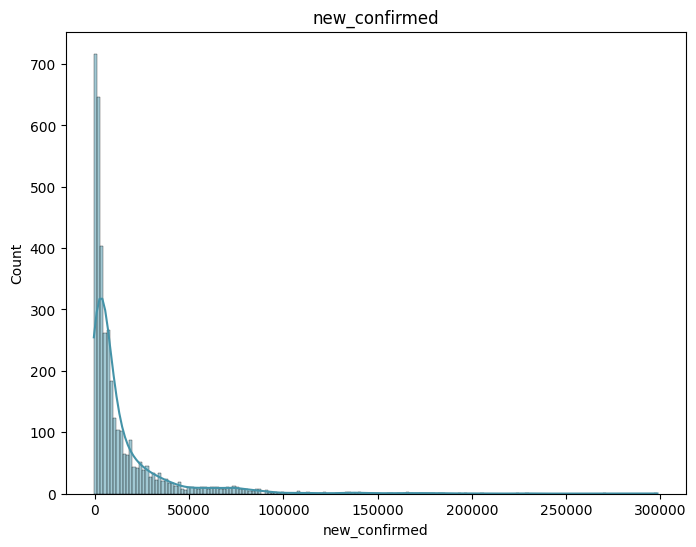

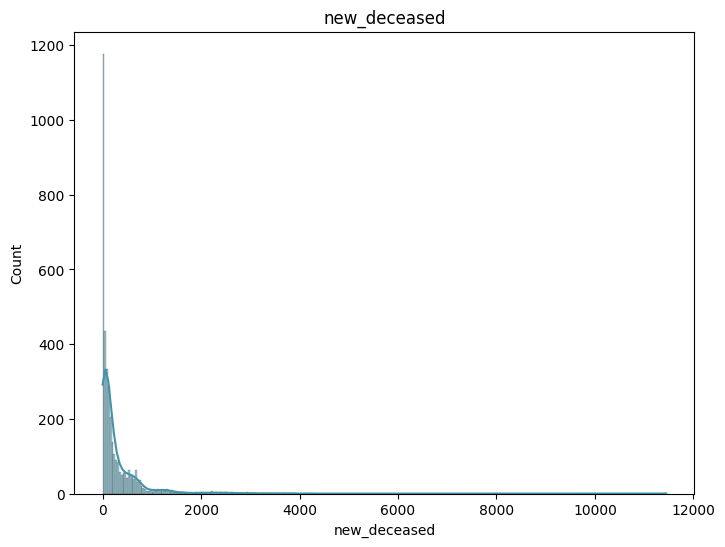

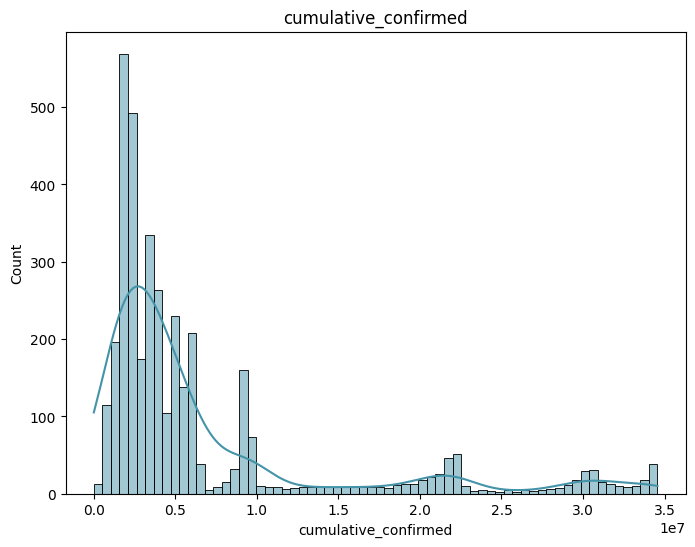

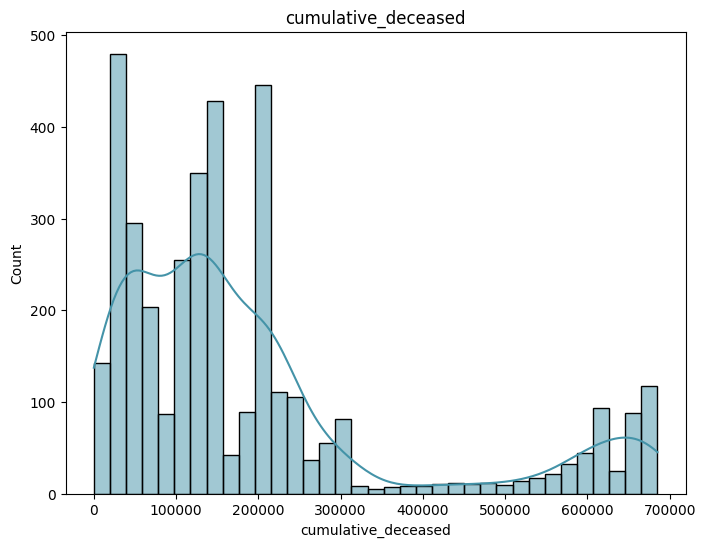

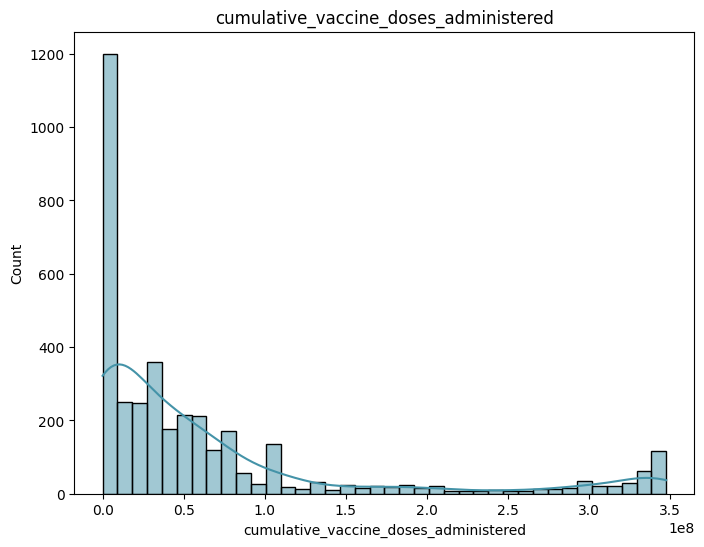

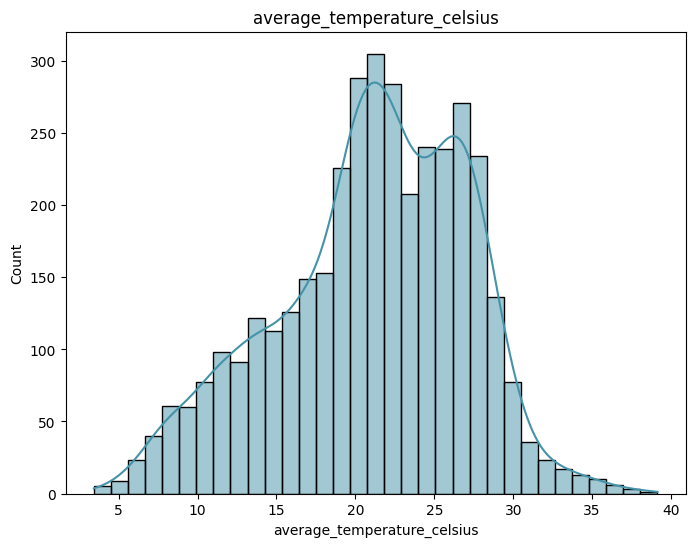

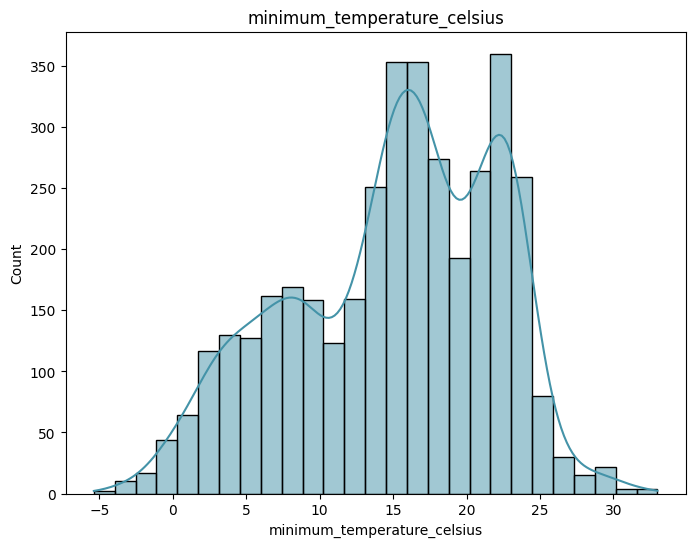

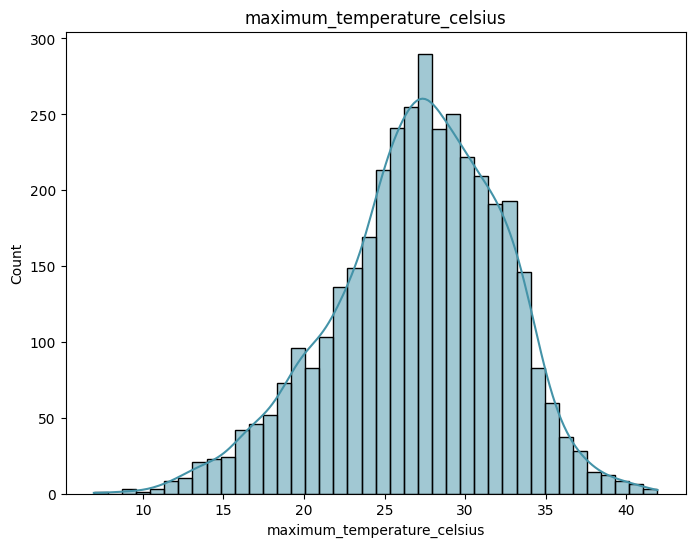

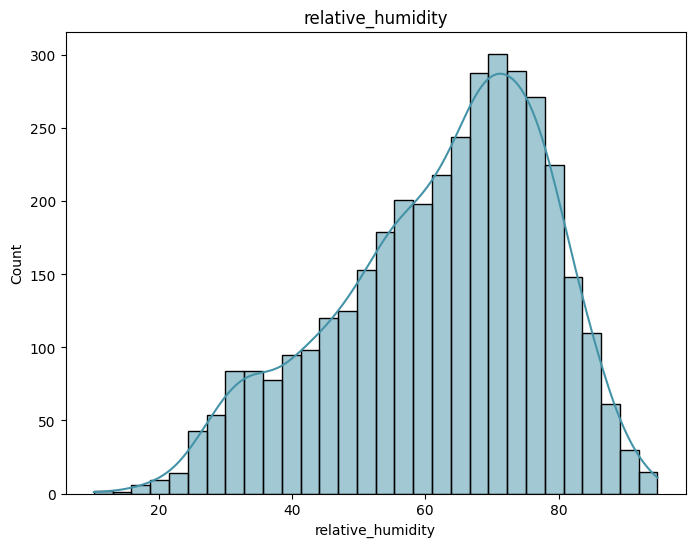

In [26]:
#Histogramas de las variables que “Sí” tengan cambios de valores.
lista_columnas = ["new_confirmed","new_deceased", "cumulative_confirmed", "cumulative_deceased","cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius", "maximum_temperature_celsius","relative_humidity"]

#Crear un ciclo for para pasar por cada una de estas columnas.
for i in data_limpia[lista_columnas]:
   fig, ax = plt.subplots(figsize=(8,6))  #Definir el gráfico.
   sns.histplot(data_limpia[i], kde=True, color="#4493A8") #Crear histograma.
   plt.title(i)
   plt.show() 

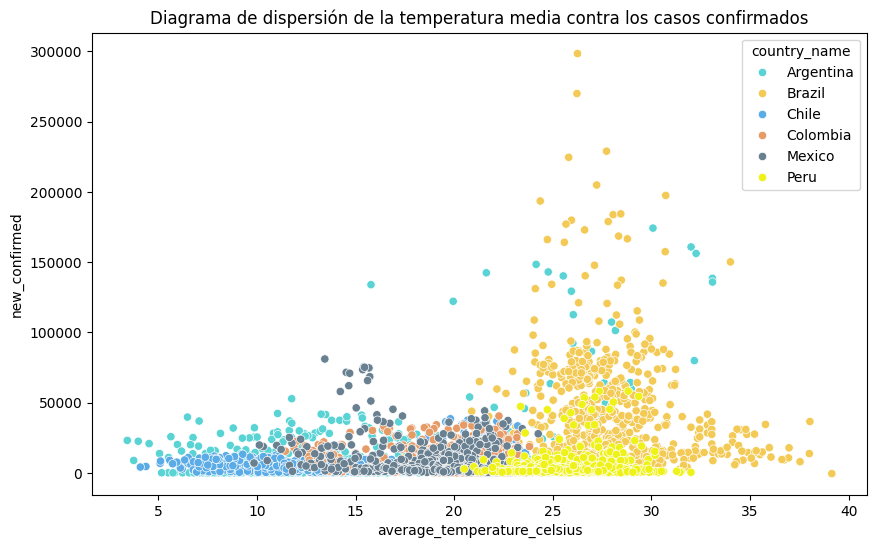

In [27]:
#Diagrama de dispersión de la temperatura media contra los casos confirmados.
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed", data=data_limpia, hue="country_name", palette=mi_paleta)
plt.title("Diagrama de dispersión de la temperatura media contra los casos confirmados")
plt.show()

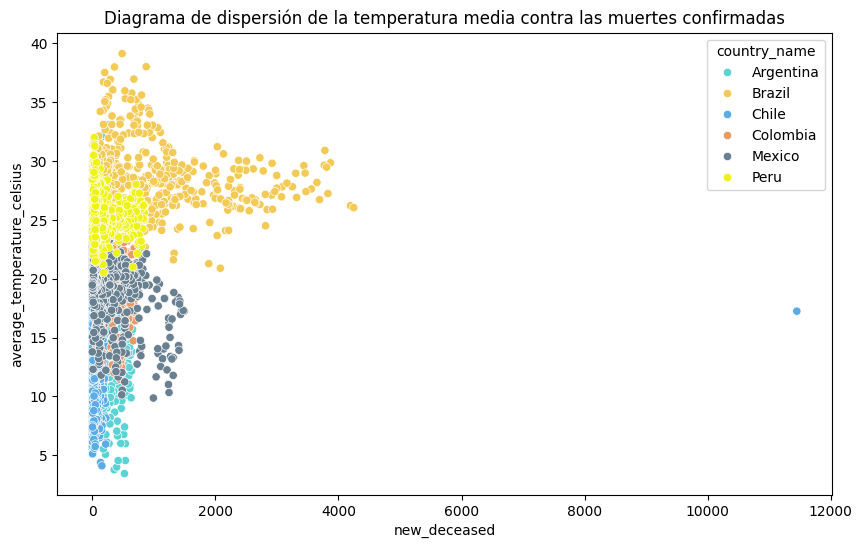

In [28]:
#Diagrama de dispersión de la temperatura media contra las muertes confirmadas.
#Es el mismo gráfico que el anterior, pero cambiando la variable.
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(y="average_temperature_celsius", x="new_deceased", data=data_limpia, hue="country_name", palette=mi_paleta)
plt.title("Diagrama de dispersión de la temperatura media contra las muertes confirmadas")
plt.show()



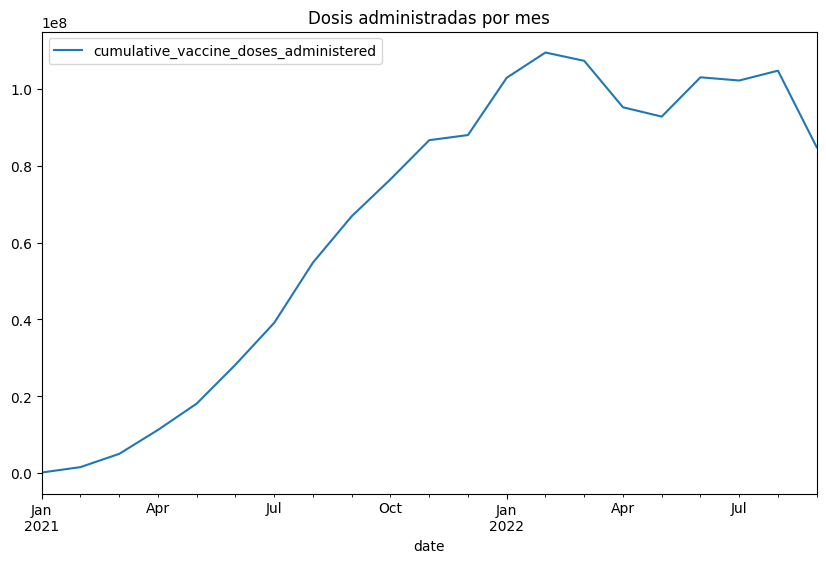

In [29]:
#Comportamiento de las dosis administradas de todos los países (Valor medio).
fig, ax= plt.subplots(figsize=(10,6))

#Con resample se agrupan los datos fecha, de manera mensual. En este caso calculando un promedio(mean).
data_limpia.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()  
plt.legend(loc="upper left")
plt.title("Dosis administradas por mes")
plt.show()

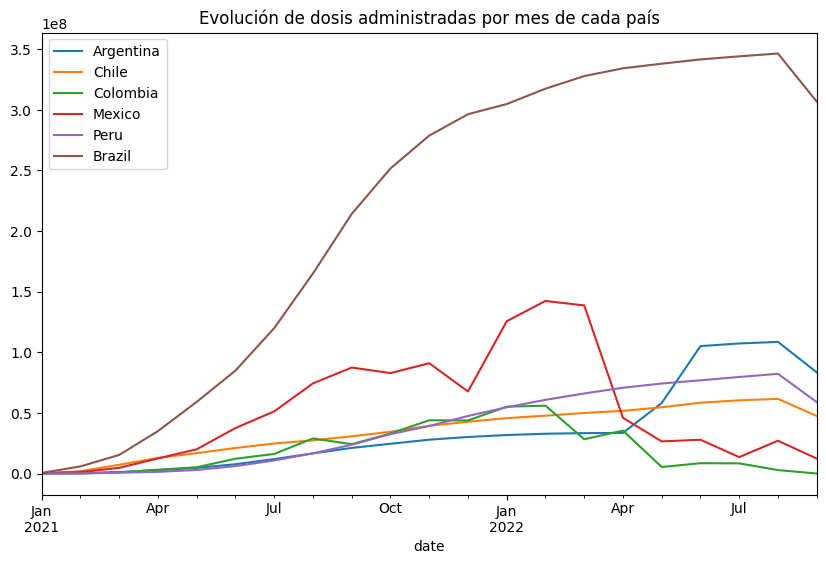

In [30]:
#Evolución de dosis administradas por mes de cada país.
#Se crea un ciclo for para que grafique todos los paises seleccionados dentro del mismo gráfico.
fig, ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.legend(loc="upper left")
plt.legend(paises_seleccionados)
plt.title("Evolución de dosis administradas por mes de cada país")
plt.show()

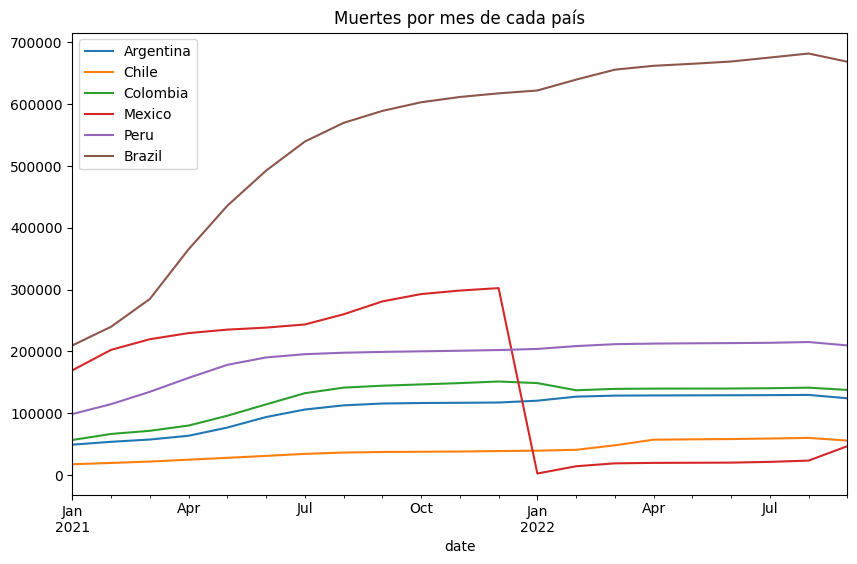

In [31]:
#Muertes por mes de cada país.
#Es el mismo gráfico que el anterior, pero cambiando la variable.
fig, ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()
plt.legend(loc="upper left")
plt.legend(paises_seleccionados)
plt.title("Muertes por mes de cada país")
plt.show()

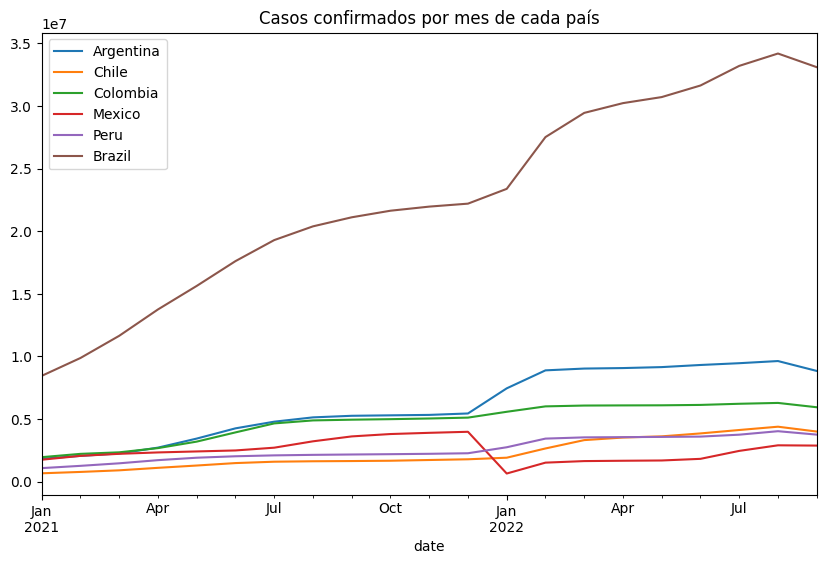

In [32]:
#Casos confirmados por mes de cada país.
#Es el mismo gráfico que el anterior, pero cambiando la variable.
fig, ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()
plt.legend(loc="upper left")
plt.legend(paises_seleccionados)
plt.title("Casos confirmados por mes de cada país")
plt.show()

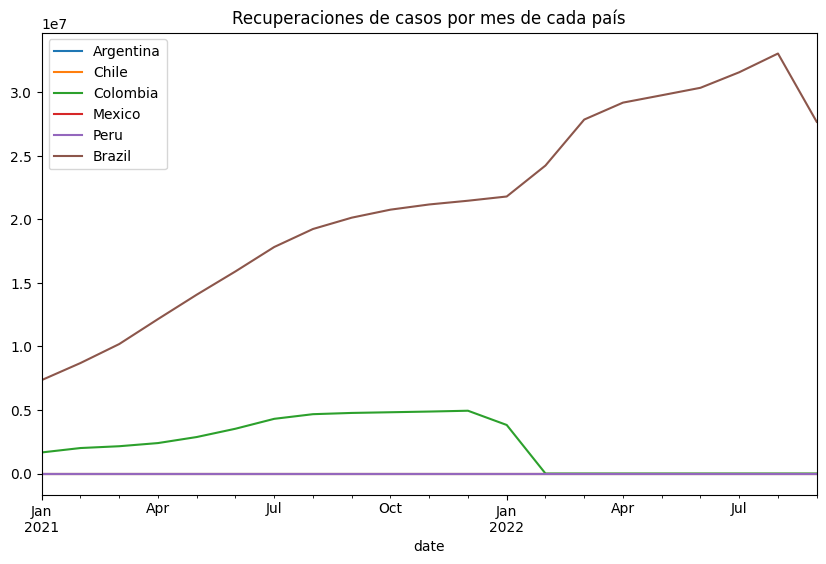

In [33]:
#Recuperaciones de casos por mes de cada país.
#Es el mismo gráfico que el anterior, pero cambiando la variable.
fig, ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot()
plt.legend(loc="upper left")
plt.legend(paises_seleccionados)
plt.title("Recuperaciones de casos por mes de cada país")
plt.show()

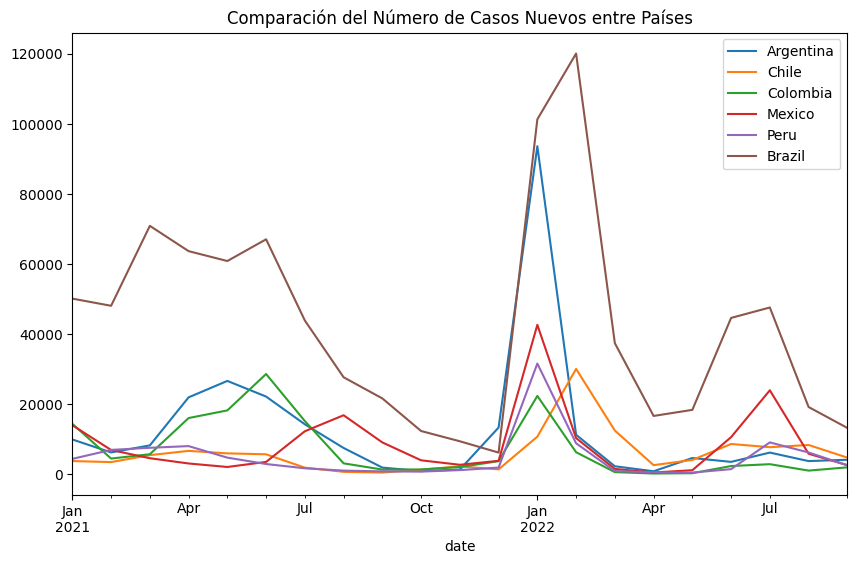

In [34]:
#Comparación del Número de Casos Nuevos entre Países.
#Es el mismo gráfico que el anterior, pero cambiando la variable.
fig, ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_limpia[data_limpia["country_name"]==pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()
plt.legend(loc="upper left")
plt.legend(paises_seleccionados)
plt.title("Comparación del Número de Casos Nuevos entre Países")
plt.show()

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

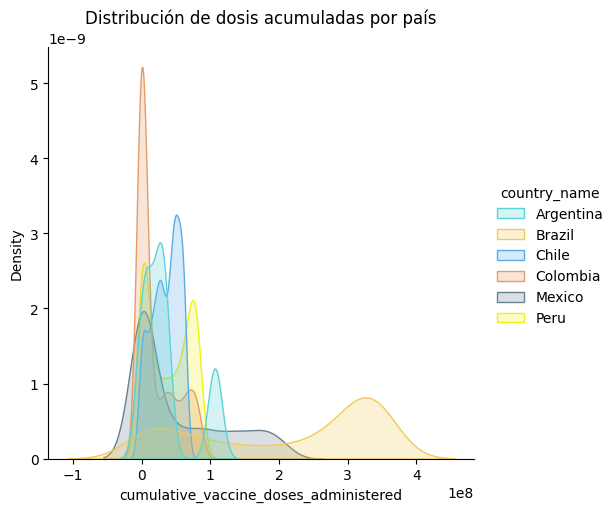

In [35]:
#Dosis acumuladas por país

sns.displot(data_limpia, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True, palette=mi_paleta)  #Usando kind=kde ya no se usan barras, sino el area
plt.title("Distribución de dosis acumuladas por país")


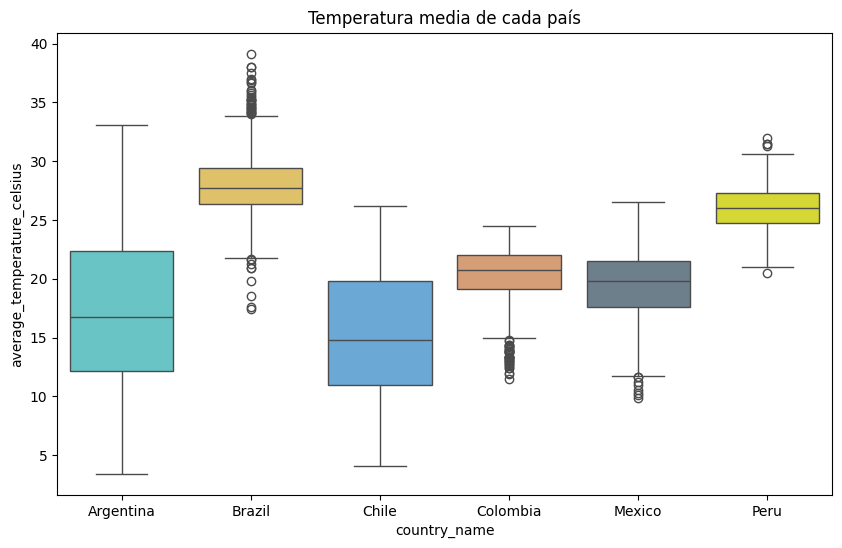

In [36]:
#Boxplot de temperatura media de cada país.
fig, ax= plt.subplots(figsize=(10,6))
sns.boxplot(x="country_name", y="average_temperature_celsius", data=data_limpia, hue="country_name", palette=mi_paleta)
plt.title("Temperatura media de cada país")
plt.show()


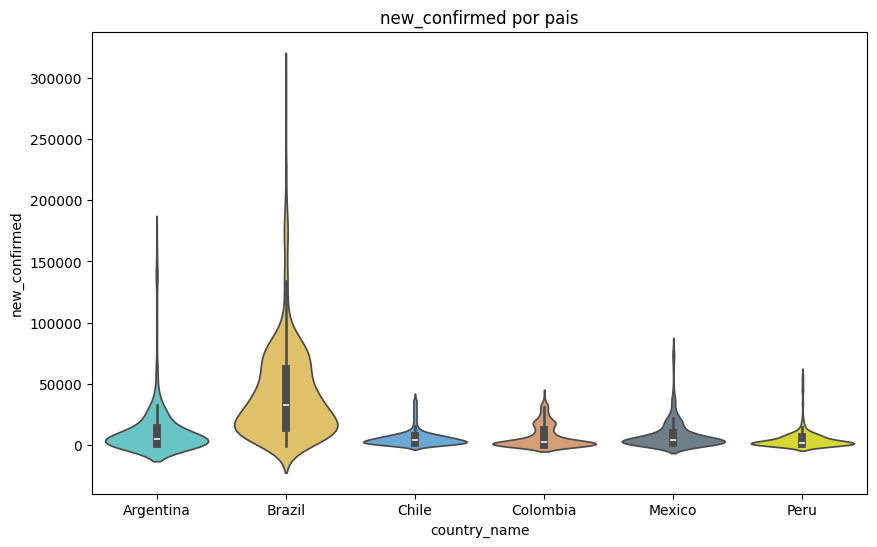

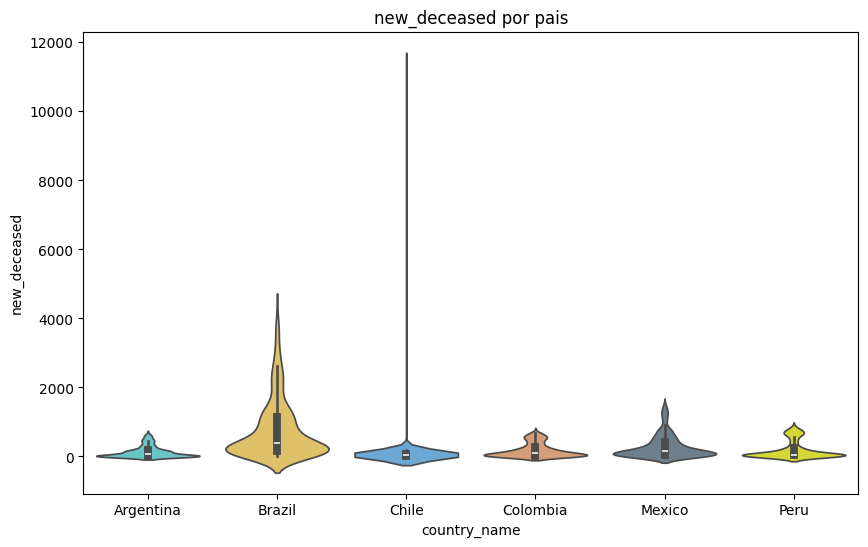

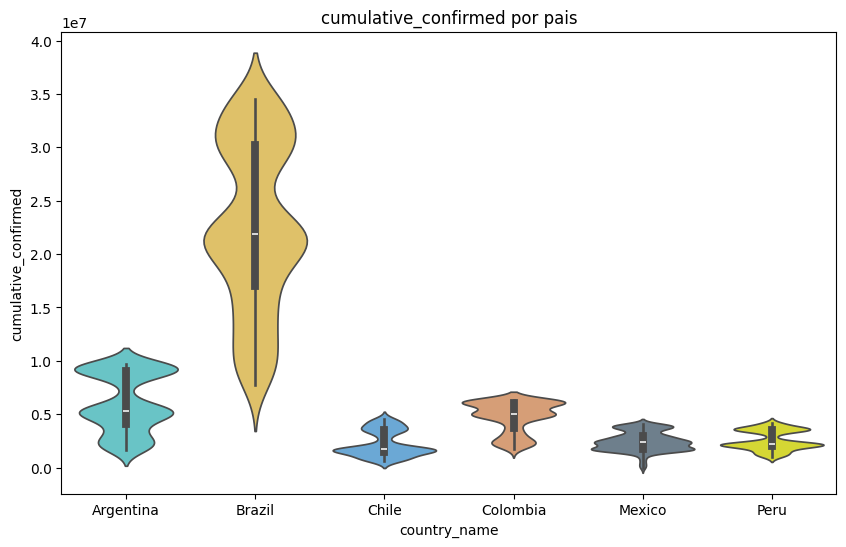

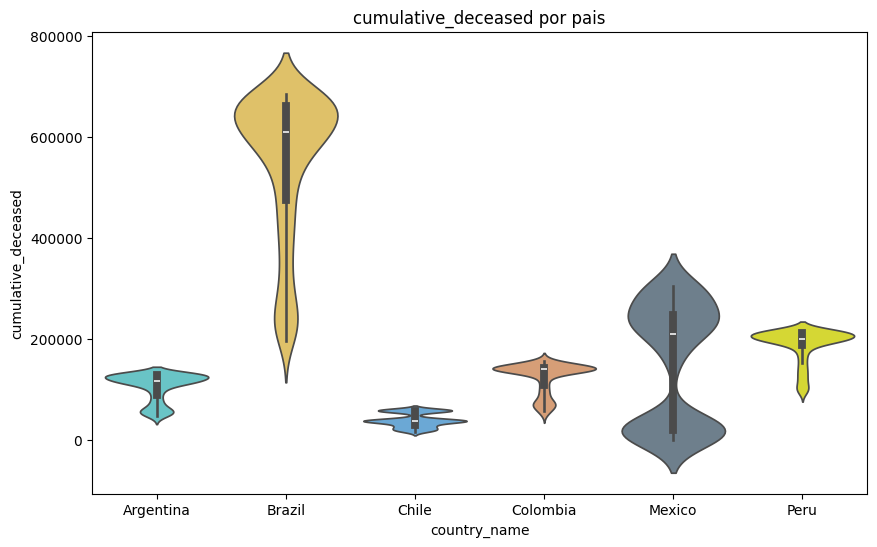

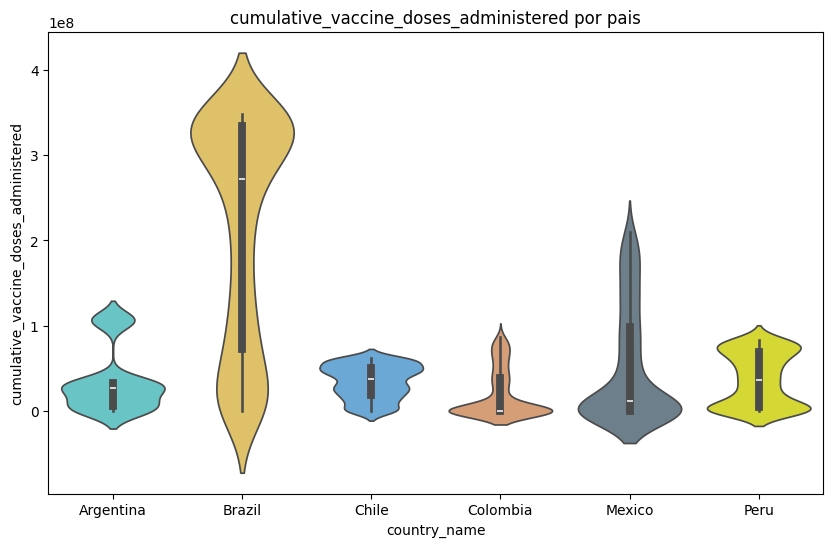

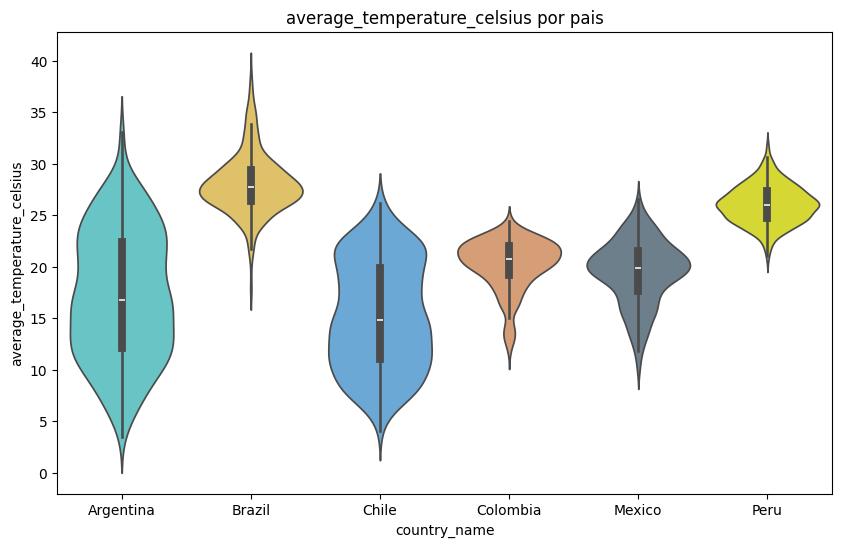

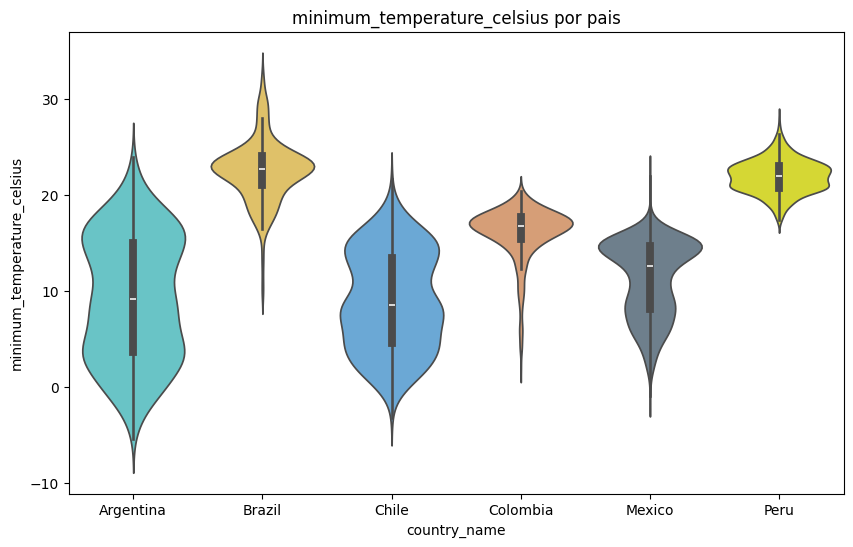

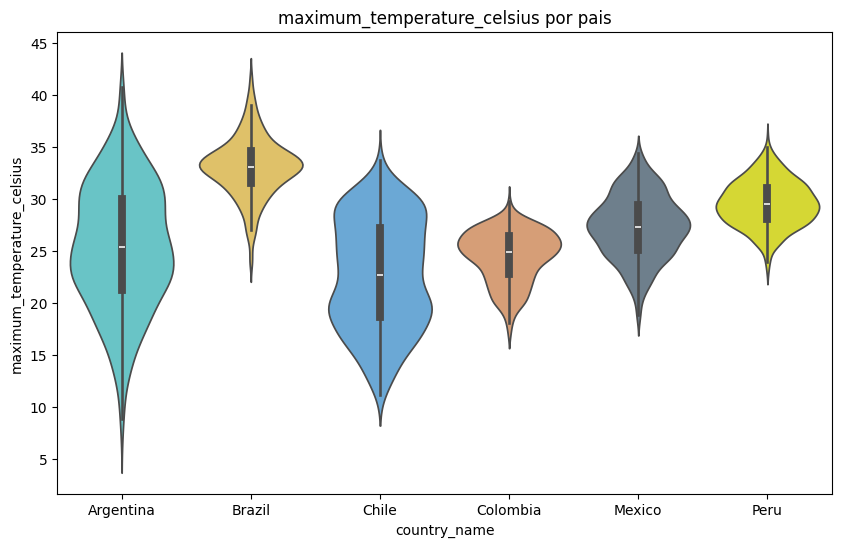

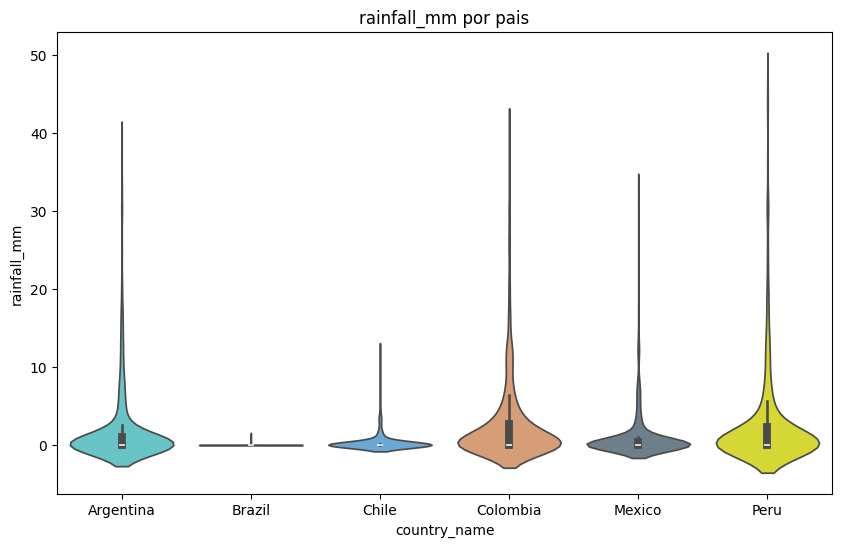

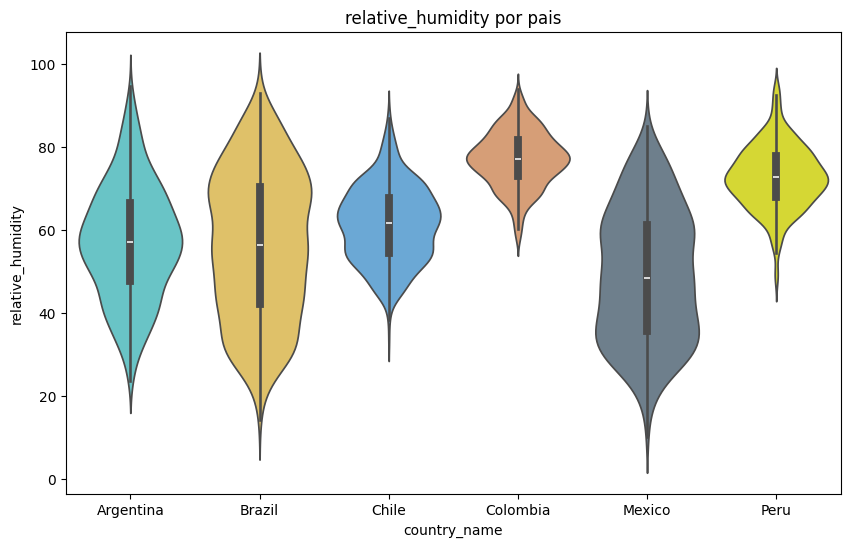

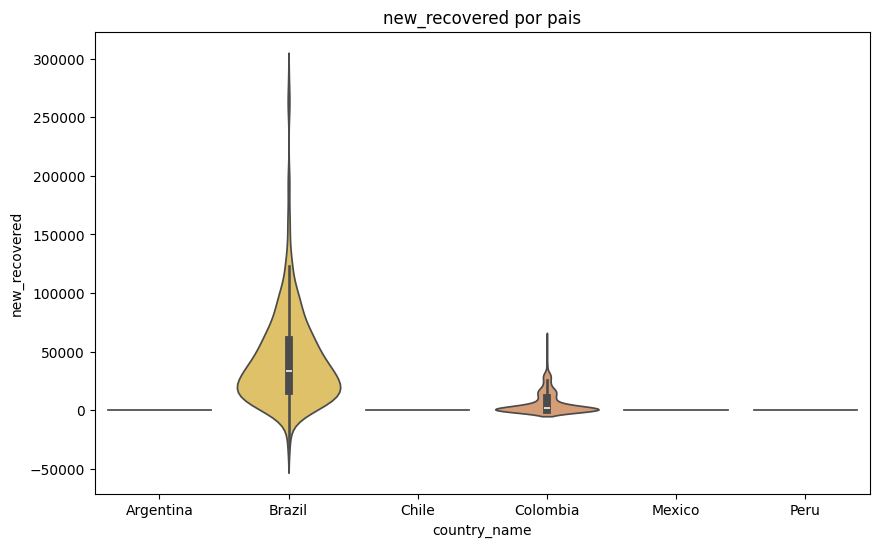

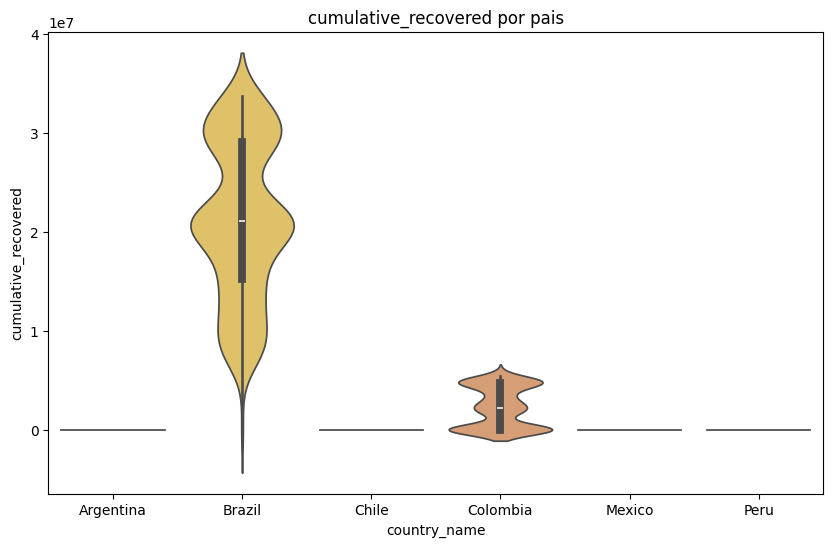

In [37]:
#Violinplot de las variables que “Sí” tengan cambios de valores.
#Se crea un dataframe con las columnas que tengan al menos 6 valores unicos, porque son las que tienen valores diferentes para cada país.
#Para ello se crea un ciclo for, para sacar aquellas columnas con información que su gráfico no aportaría información relevante.
columnas_cambios=[]
for i in data_limpia.columns:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude"]:
        if data_limpia[i].nunique()>6:
            columnas_cambios.append(i)

#Agregar a las columnas columnas_cambio, la columna country_name para poder hacer un análisis por país.
columnas_cambios.append("country_name")

#Se crea el dataframe 
data_limpia_columnas_cambios= data_limpia[columnas_cambios]

#Se crean los violinplot en todos los países para las variables numéricas, con un ciclo for para pasar por todas las columnas.
for i in data_limpia_columnas_cambios:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude", "country_name"]:
        fig, ax= plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name", y=i, data=data_limpia_columnas_cambios, hue="country_name", palette=mi_paleta)
        plt.title(f"{i} por pais")
        plt.show() 

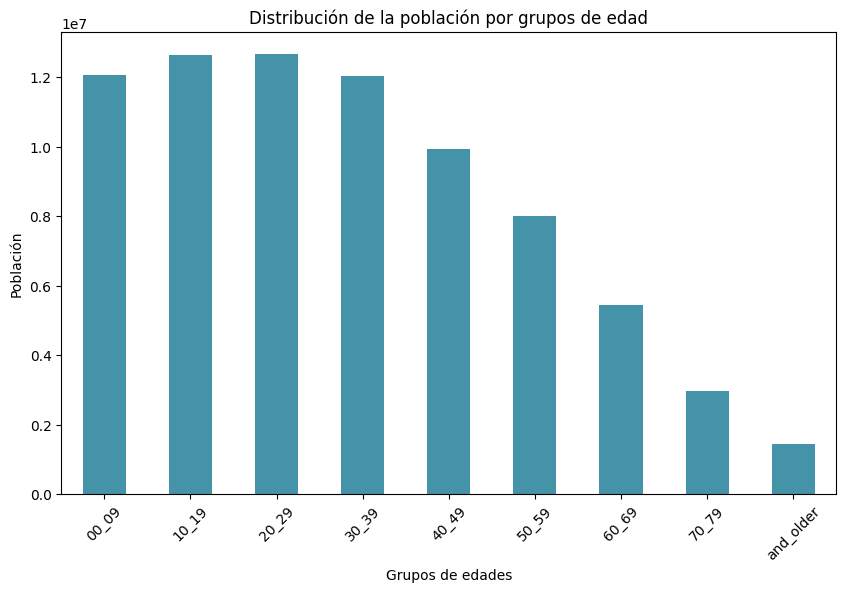

In [38]:
#Distribución de la población por grupos de edad.
 #Crear una variable para agrupar las columnas de edades.

age_columns = ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39", "population_age_40_49", "population_age_50_59", "population_age_60_69", "population_age_70_79", "population_age_80_and_older"]

#Para calcular la distribución por grupo de edad, hacer un promedio.
distribucion_edad = data_limpia[age_columns].mean()

#Crear el gráfico.
plt.figure(figsize=(10, 6)) 
distribucion_edad.plot(kind="bar", stacked=True, color='#4493A8')
plt.xlabel("Grupos de edades")
plt.ylabel("Población")
plt.title("Distribución de la población por grupos de edad")
plt.xticks(range(len(age_columns)), [col.split("_")[-2]+ "_" + col.split("_")[-1] for col in age_columns], rotation=45) #Para acortar el nombre de las variables 
plt.show()

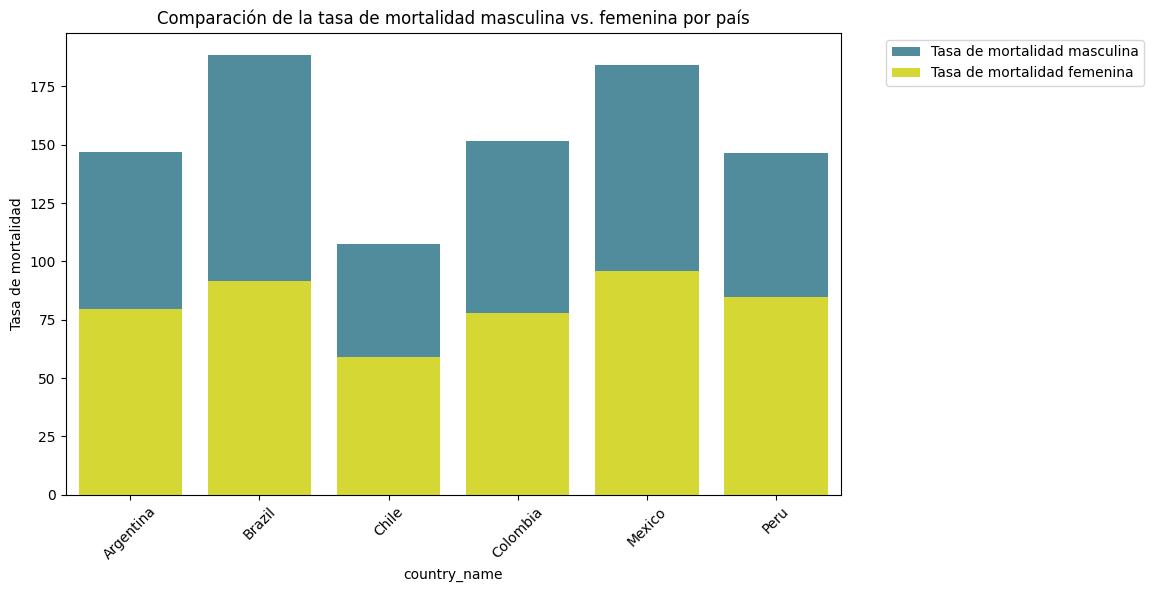

In [39]:
#Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

plt.figure(figsize=(10, 6)) 
sns.barplot(data=data_limpia, x="country_name", y="adult_male_mortality_rate", color="#4493A8", label="Tasa de mortalidad masculina")
sns.barplot(data=data_limpia, x="country_name", y="adult_female_mortality_rate", color="#EFF219", label="Tasa de mortalidad femenina")
plt.xticks(rotation=45)
plt.ylabel("Tasa de mortalidad")
plt.title("Comparación de la tasa de mortalidad masculina vs. femenina por país")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

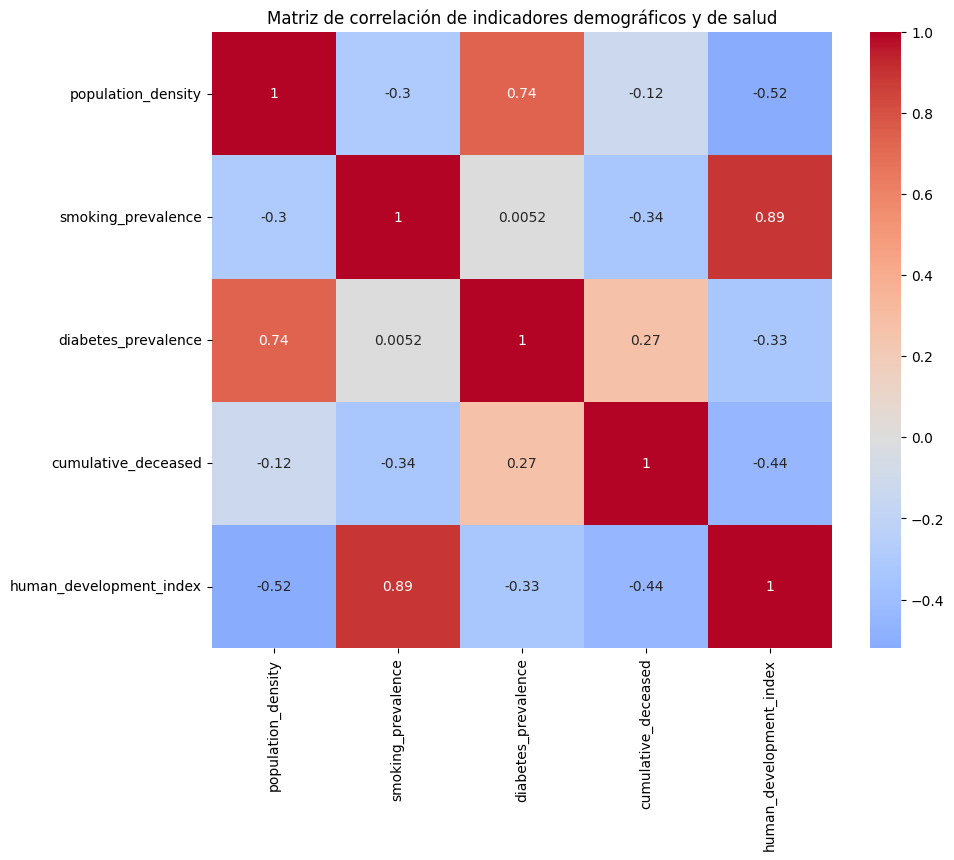

In [40]:
#Matriz de correlación de indicadores demográficos y de salud.
columnas_demografia = ["population_density", "smoking_prevalence", "diabetes_prevalence", "cumulative_deceased", "human_development_index"]
matriz_demografica = data_limpia[columnas_demografia].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_demografica, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de indicadores demográficos y de salud")
plt.show()

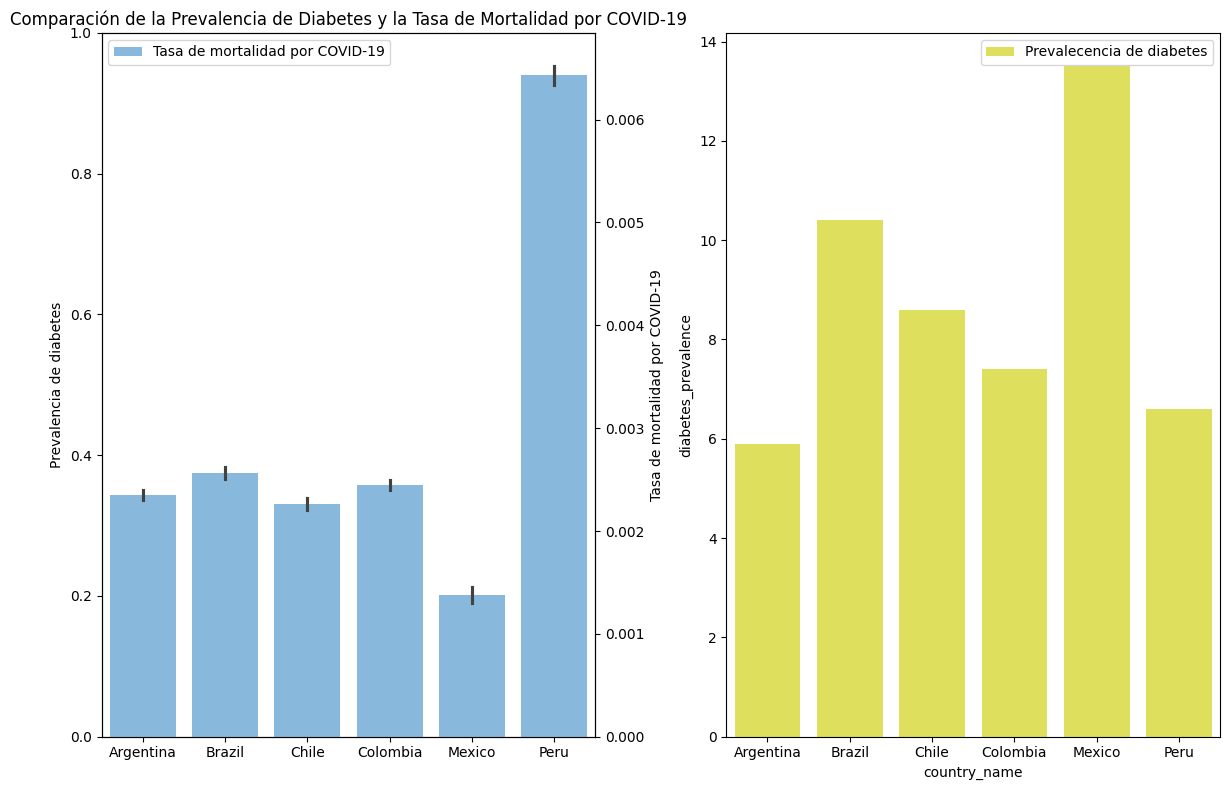

In [41]:
#Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.
#Primero hago el cálculo de la tasa de mortalidad:
data_limpia["tasa_mortalidad"] = data_limpia["cumulative_deceased"] / data_limpia["population"] 

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=data_limpia, x="country_name", y="diabetes_prevalence", color="#EFF219", label="Prevalecencia de diabetes", alpha=0.8)
ax2=ax.twinx()   #Para usar los mismos valores en ambos ejes x.
sns.barplot(data=data_limpia, x="country_name", y="tasa_mortalidad", color="#5AABE6", label="Tasa de mortalidad por COVID-19", ax=ax2, alpha=0.8)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalencia de diabetes")
ax2.set_ylabel("Tasa de mortalidad por COVID-19")
plt.title("Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()            


## Avance 3

In [42]:
data_avance3 = pd.read_csv("datos_finales_filtrado.csv")

In [43]:
#Poner como indice la columna "date" para poder realizar análisis de los datos a lo largo del tiempo.
data_avance3["date"] = pd.to_datetime(data_avance3["date"]) 
data_avance3.set_index("date", inplace=True)

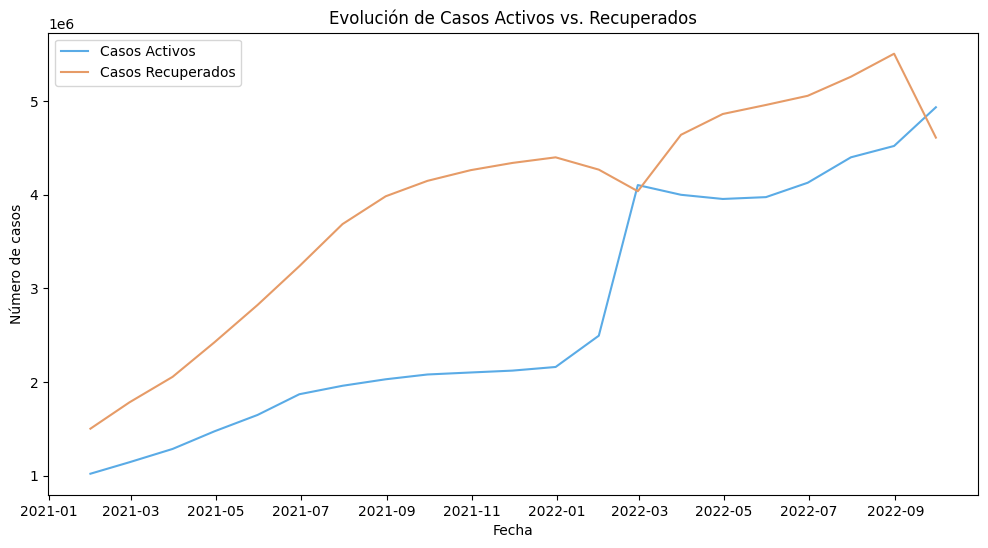

In [44]:
#Evolución de Casos Activos vs. Recuperados
plt.figure(figsize=(12, 6)) 

data_avance3["casos_activos"] = data_avance3["cumulative_confirmed"] - data_avance3["cumulative_deceased"] - data_avance3["cumulative_recovered"]


sns.lineplot(data=data_avance3.resample("ME").mean(numeric_only=True), x="date", y="casos_activos", label="Casos Activos", color="#5AABE6")
sns.lineplot(data=data_avance3.resample("ME").mean(numeric_only=True), x="date", y="cumulative_recovered", label="Casos Recuperados", color="#E69B67")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.title("Evolución de Casos Activos vs. Recuperados")
plt.legend(loc='upper left')
plt.show()

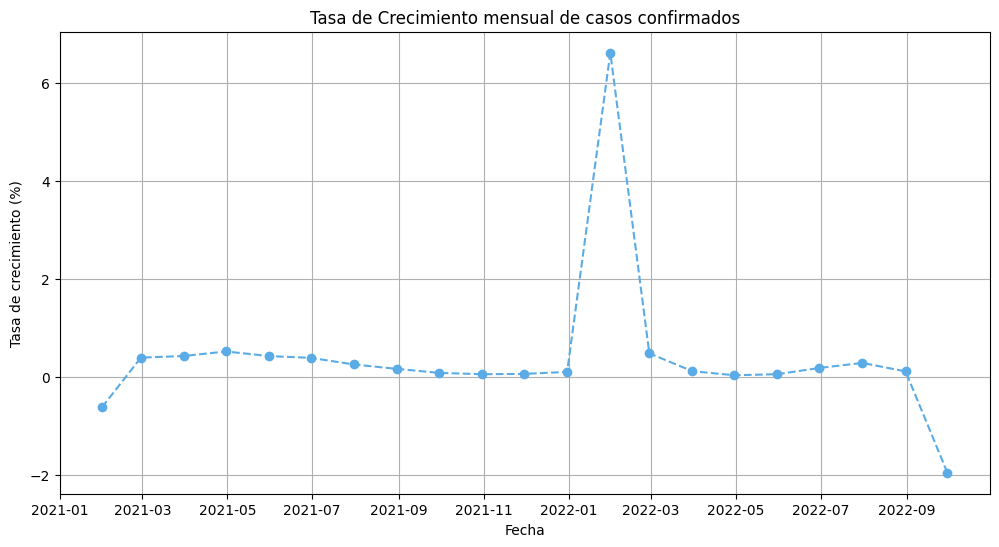

In [45]:
#Tasa de Crecimiento (%)

# Calcular la tasa de crecimiento (%)
data_avance3["tasa_crecimiento"] = data_avance3["cumulative_confirmed"].pct_change() * 100  
#Este método calcula el cambio porcentual entre cada valor y el valor anterior en la columna, es decir, calcula la tasa de crecimiento entre cada par de valores consecutivos.

# Agrupar de manera mensual calculando el promedio
data_mensual_promedio = data_avance3.resample("ME").mean(numeric_only=True)

# Crear la gráfica.
plt.figure(figsize=(12, 6))
plt.plot(data_mensual_promedio.index, data_mensual_promedio["tasa_crecimiento"], marker='o', linestyle='--', color="#5AABE6")
plt.title("Tasa de Crecimiento mensual de casos confirmados")
plt.xlabel("Fecha")
plt.ylabel("Tasa de crecimiento (%)")
plt.grid(True)
plt.show()

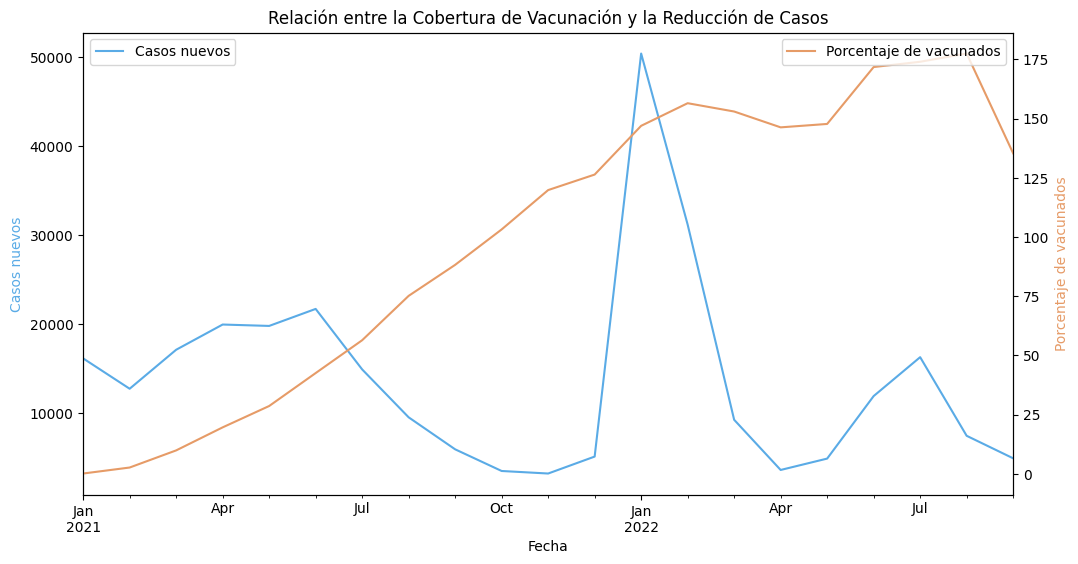

In [46]:
#Relación entre la Cobertura de Vacunación y la Reducción de Casos

plt.figure(figsize=(12, 6))
ax1= plt.gca()
ax2= ax1.twinx()

#Calcular el porcentaje de vacunados 
data_avance3["porcentaje_vacunados"] = data_avance3["cumulative_vaccine_doses_administered"] / data_avance3["population"] *100
data_avance3.resample("ME").mean(numeric_only=True)["new_confirmed"].plot(ax=ax1, color="#5AABE6", label="Casos nuevos")
data_avance3.resample("ME").mean(numeric_only=True)["porcentaje_vacunados"].plot(ax=ax2, color="#E69B67", label="Porcentaje de vacunados")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos nuevos", color="#5AABE6")
ax2.set_ylabel("Porcentaje de vacunados", color="#E69B67")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


Text(0.5, 1.0, 'Progreso de la vacunación por país')

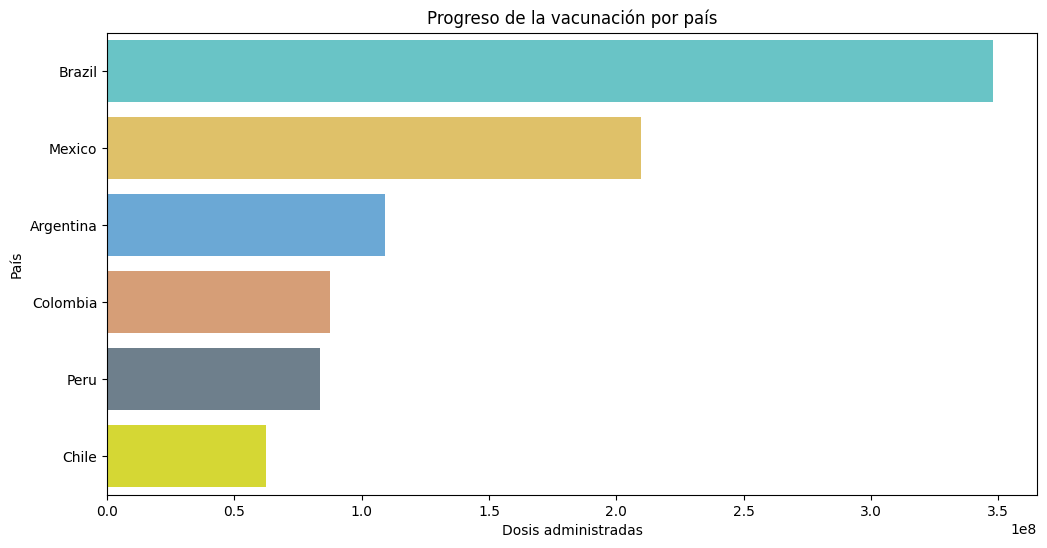

In [47]:
#Progreso de la vacunación por país
#Agrupar por país, el número máximo de dosis de vacunas administradas acumuladas, ordenados de mayor a menor.
datos_vacunacion = data_avance3.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=datos_vacunacion.values, y=datos_vacunacion.index, hue=datos_vacunacion.index, palette=mi_paleta)
plt.xlabel("Dosis administradas")
plt.ylabel("País")
plt.title("Progreso de la vacunación por país")

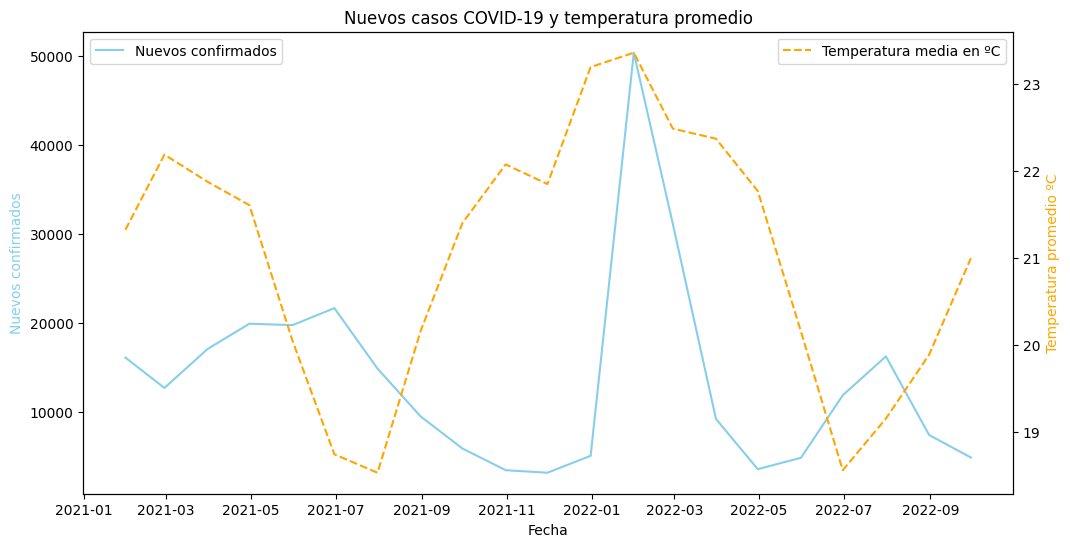

In [48]:
#Nuevos casos y temperatura promedio
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Graficar la línea de nuevos confirmados
ax1.plot(data_avance3.resample("ME").mean(numeric_only=True).index, data_avance3.resample("ME").mean(numeric_only=True)["new_confirmed"], color="skyblue", label="Nuevos confirmados")
ax2.plot(data_avance3.resample("ME").mean(numeric_only=True).index, data_avance3.resample("ME").mean(numeric_only=True)["average_temperature_celsius"], color="orange", label="Temperatura media en ºC", linestyle="--")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Nuevos confirmados", color="skyblue")
ax2.set_ylabel("Temperatura promedio ºC", color="orange")
plt.title("Nuevos casos COVID-19 y temperatura promedio")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_22424\1621507228.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_urbanizacion["porcentaje_urbanizacion"], y=casos_urbanizacion.index, palette="viridis", alpha=0.5)


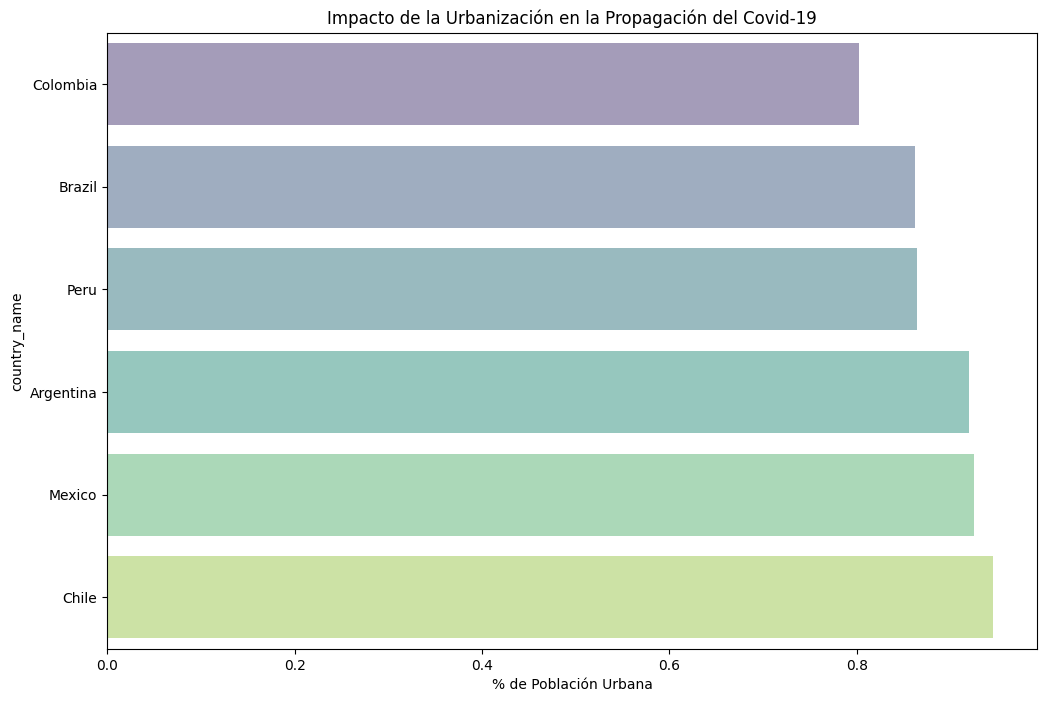

In [49]:
#Impacto de la Urbanización en la Propagación del Covid-19
#Calcular el porcentaje de urbanización (poblacion viviendo en ciudades).
data_avance3["porcentaje_urbanizacion"] = data_avance3["population_urban"]/data_avance3["population"]
casos_urbanizacion = data_avance3.groupby("country_name").last().sort_values(by="porcentaje_urbanizacion")

plt.figure(figsize=(12,8))
sns.barplot(x=casos_urbanizacion["porcentaje_urbanizacion"], y=casos_urbanizacion.index, palette="viridis", alpha=0.5)
plt.title("Impacto de la Urbanización en la Propagación del Covid-19")
plt.xlabel("% de Población Urbana")
plt.show()

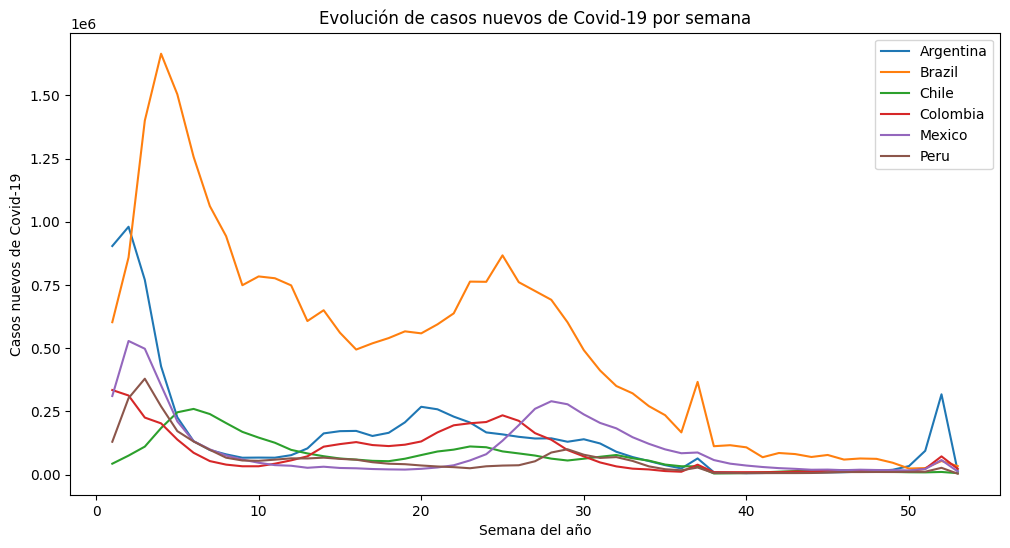

In [50]:
#Evolución Semanal de Casos Nuevos
data_avance3["week"] = data_avance3.index.isocalendar().week
casos_semanales= data_avance3.groupby(["week","country_name"])["new_confirmed"].sum().reset_index()

plt.figure(figsize=(12, 6))
for pais in casos_semanales["country_name"].unique():
    casos_semanales_pais = casos_semanales[casos_semanales["country_name"]== pais]
    plt.plot(casos_semanales_pais["week"],casos_semanales_pais["new_confirmed"],label=pais)

plt.xlabel("Semana del año")
plt.ylabel("Casos nuevos de Covid-19")
plt.title("Evolución de casos nuevos de Covid-19 por semana")
plt.legend(loc="upper right")
plt.show()



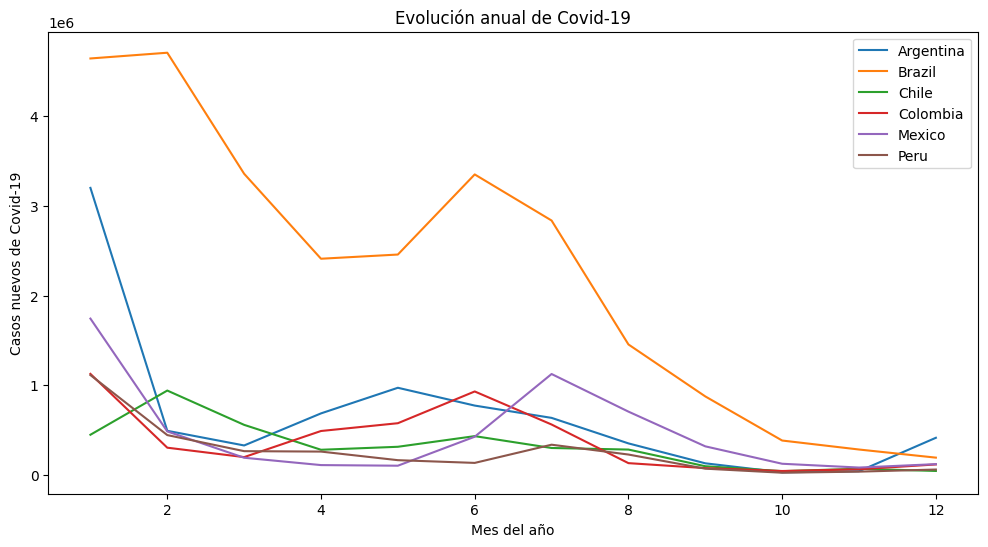

In [51]:
#Evolución Anual de Casos Nuevos

data_avance3["month"] = data_avance3.index.month
casos_mensuales= data_avance3.groupby(["month","country_name"])["new_confirmed"].sum().reset_index()

plt.figure(figsize=(12, 6))
for pais in casos_mensuales["country_name"].unique():
    casos_mensuales_pais = casos_mensuales[casos_mensuales["country_name"]== pais]
    plt.plot(casos_mensuales_pais["month"],casos_mensuales_pais["new_confirmed"],label=pais)
    
plt.xlabel("Mes del año")
plt.ylabel("Casos nuevos de Covid-19")
plt.title("Evolución anual de Covid-19")
plt.legend(loc="upper right")
plt.show()

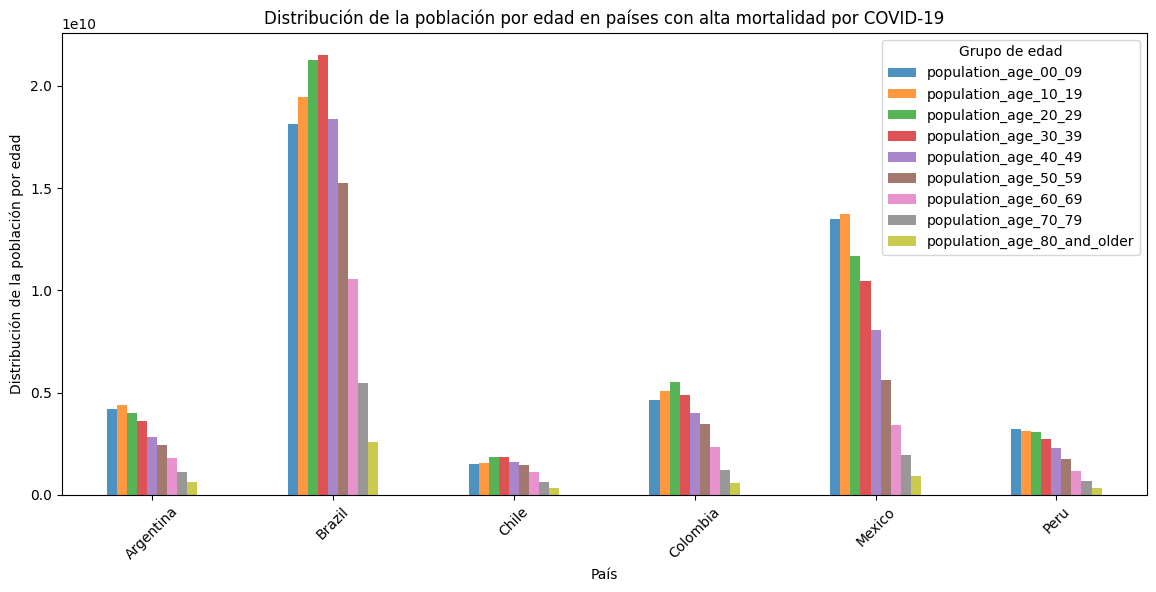

In [52]:
#Distribución de la Población por Edad en Países

# Seleccionar los países con alta mortalidad
paises_alta_mortalidad = data_avance3.groupby("country_name")["cumulative_deceased"].max().sort_values(ascending=False).head(6).index

# Definir los grupos de edades
grupo_edades = ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39", "population_age_40_49", "population_age_50_59", "population_age_60_69", "population_age_70_79", "population_age_80_and_older"]

# Calcular la distribución de edades para los países con alta mortalidad
distribucion_edades = data_avance3[data_avance3["country_name"].isin(paises_alta_mortalidad)].groupby("country_name")[grupo_edades].sum()

# Graficar la distribución de la población por edad
distribucion_edades.plot(kind="bar", stacked=False, figsize=(14, 6), alpha=0.8)

plt.xlabel("País")
plt.xticks(rotation=45)
plt.ylabel("Distribución de la población por edad")
plt.title("Distribución de la población por edad en países con alta mortalidad por COVID-19")
plt.legend(title="Grupo de edad")
plt.show()

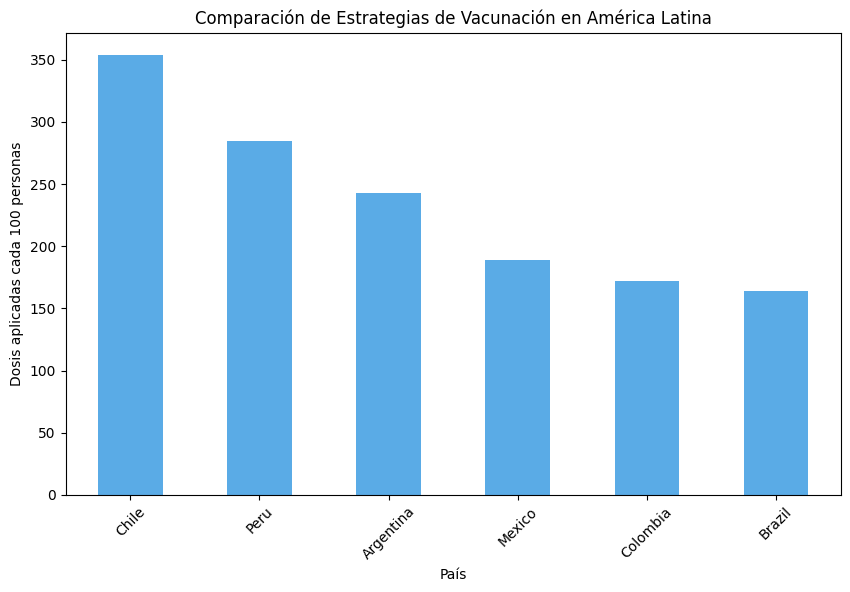

In [53]:
#Comparación de Estrategias de Vacunación en América Latina
#Calcular el porcentaje de la población que ha recibido las dosis de vacunas.
estrategia_vacunacion = data_avance3.groupby("country_name")["cumulative_vaccine_doses_administered"].max() / data_avance3.groupby("country_name")["population"].max() * 100

#Crear el gráfico que muestra el porcentaje de la población vacunada para cada país, ordenado de mayor a menor.
estrategia_vacunacion.sort_values(ascending=False).plot(kind="bar", figsize=(10,6), color="#5AABE6")

plt.xlabel("País")
plt.xticks(rotation=45)
plt.ylabel("Dosis aplicadas cada 100 personas")
plt.title("Comparación de Estrategias de Vacunación en América Latina")
plt.show()

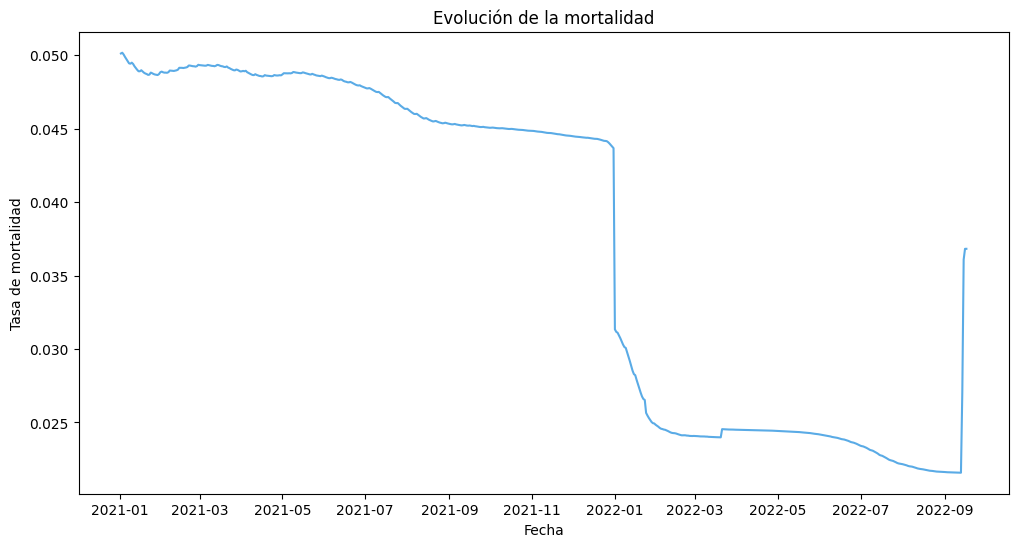

In [54]:
#Evolución del Número de Muertes Diarias.

data_avance3["ratio_mortalidad"] = data_avance3["cumulative_deceased"] / data_avance3["cumulative_confirmed"]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data_avance3, x="date", y="ratio_mortalidad", estimator="mean", errorbar=None, color="#5AABE6")
plt.title("Evolución de la mortalidad")
plt.xlabel("Fecha")
plt.ylabel("Tasa de mortalidad")
plt.show()

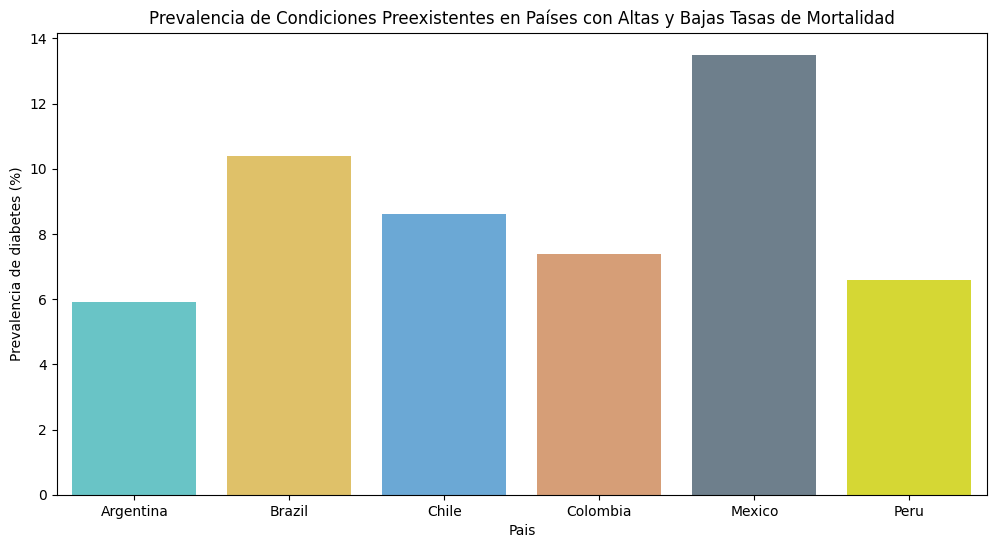

In [55]:
#Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

#Buscar los 5 países con el mayor número máximo de fallecimientos acumulados.Países con altas tasas de mortalidad.
top_paises = data_avance3.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index
#Buscar los 5 países con el menor número minimo de fallecidos acumulados.Países con bajas tasas de mortalidad.
bottom_paises = data_avance3.groupby("country_name")["cumulative_deceased"].min().nsmallest(5).index
#Unir ambos resultados.
condiciones = data_avance3[data_avance3["country_name"].isin(top_paises.union(bottom_paises))]

#Prevalencia Diabetes
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data= condiciones, x="country_name", y="diabetes_prevalence", hue="country_name", palette=mi_paleta)
plt.xlabel("Pais")
plt.ylabel("Prevalencia de diabetes (%)")
plt.title("Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad")
plt.show()
    

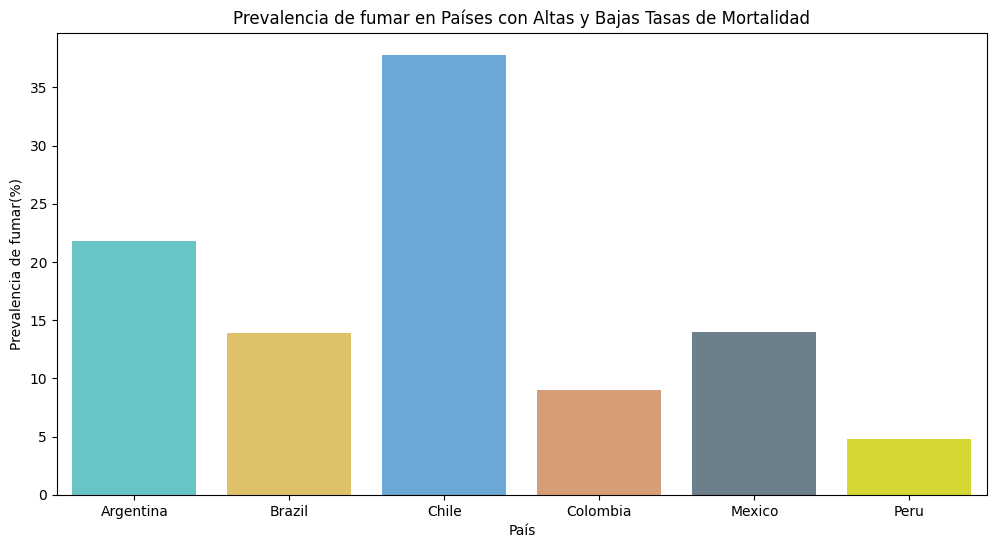

In [56]:
#Prevalencia de fumar
#Igual al gráfico anterior pero cambiando la variable.

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data= condiciones, x="country_name", y="smoking_prevalence", hue="country_name", palette=mi_paleta)
plt.xlabel("País")
plt.ylabel("Prevalencia de fumar(%)")
plt.title("Prevalencia de fumar en Países con Altas y Bajas Tasas de Mortalidad")
plt.show()

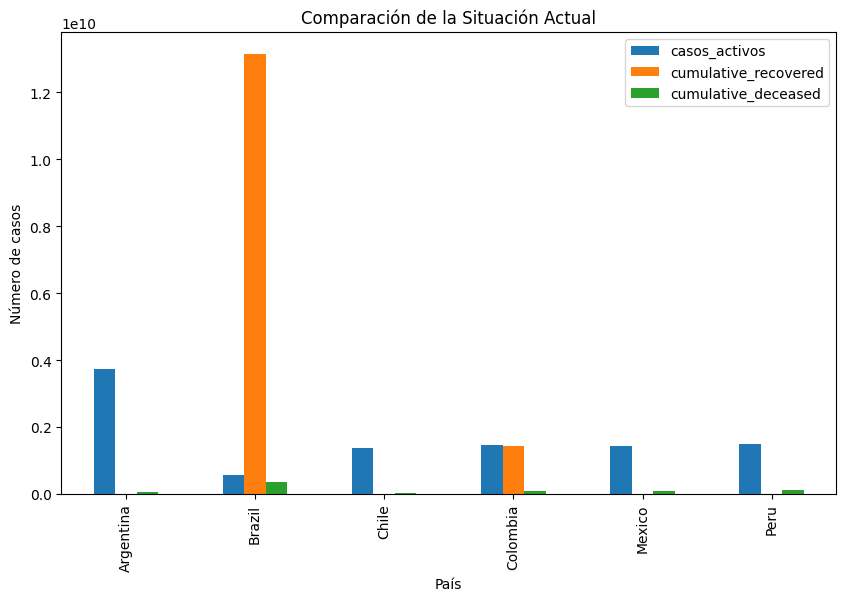

In [57]:
#Comparación de la Situación Actual (Contexto de los datos)
situacion_actual= data_avance3.groupby("country_name").sum()[["casos_activos","cumulative_recovered","cumulative_deceased"]]

situacion_actual.plot(kind="bar", stacked=False, figsize=(10,6))
plt.xlabel("País")
plt.ylabel("Número de casos")
plt.title("Comparación de la Situación Actual")
plt.show()


## Extra credit

In [58]:
#Leer el archivo descargado para crear mapas, y ver los primeros datos para saber con que columna unir nuestra tabla con el mapa.
countries_fp = "C:/Users/HP/Desktop/Python/mapas/ne_110m_admin_0_countries"
countries = gpd.read_file(countries_fp)
print(countries.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

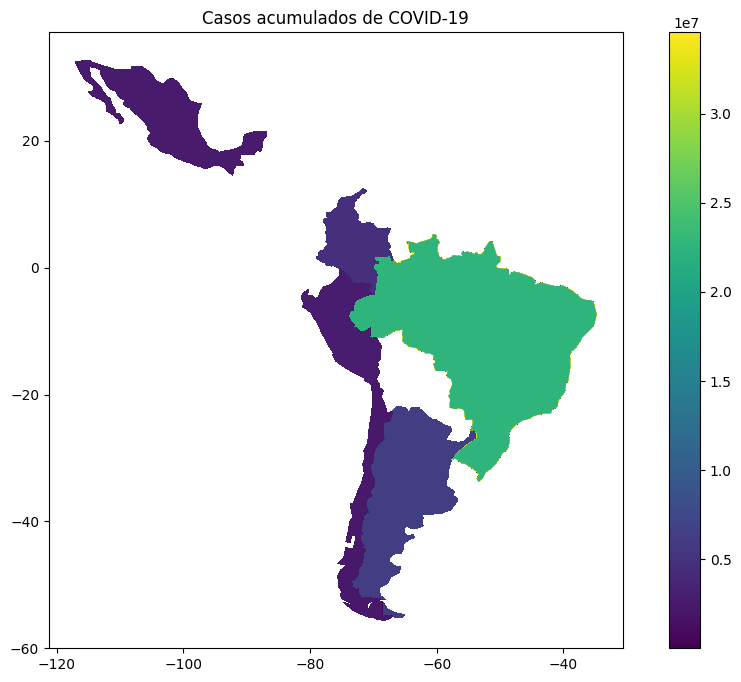

In [59]:
# Unir el mapa con nuestra tabla
countries = countries.merge(data_avance3[["country_name", "cumulative_confirmed"]], how="left", left_on="SOVEREIGNT", right_on="country_name")

# Graficar el mapa.
countries.plot(column="cumulative_confirmed", cmap="viridis", legend=True, figsize=(12, 8))
plt.title("Casos acumulados de COVID-19")
plt.show()